# CartPole DQN





## Select processing devices (optional)

In [ ]:
# import os
# os.environ[]...
# ...

# Import dependencies

### Install gym

In [ ]:
pip install gym

### Import

In [1]:
import random
import gym
from gym import wrappers
import numpy as np
import os # for creating directories

from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


#needed for gif
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import animation

Using TensorFlow backend.


## Set parameters

In [2]:
environment = gym.make('CartPole-v0')

environment = wrappers.Monitor(environment, 'modelOutput/test', video_callable=False ,force=True)

In [3]:
stateSize = environment.observation_space.shape[0]

In [4]:
actionSize = environment.action_space.n

In [5]:
batchSize = 32

In [6]:
episodes = 4000

In [7]:
outputDirectory = 'modelOutput/cartpole'

In [8]:
if not os.path.exists(outputDirectory):
    os.makedirs(outputDirectory)

# Define Gif Making Method

In [9]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))


# Define Agent

In [10]:
class DQNAgent:
    
    
    def __init__(self, stateSize, actionSize):
        
        self.stateSize = stateSize
        self.actionSize = actionSize
        
        self.memory = deque(maxlen = 2000)
        
        self.gamma = .95
        
        self.epsilon = 1.0 # 100% to exploration 0% to exploitation
        self.epsilonDecay = .9965
        self.epsilonMin = .001
        
        self.learningRate = .001
        
        self.model = self.buildModel()
        
        
    def buildModel(self):
        
        model = Sequential()
        
        model.add(Dense(24, input_dim = self.stateSize, activation = 'relu'))
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(self.actionSize, activation = 'linear')) # directly, instead of propability or abstract
        
        model.compile(loss = 'mse', optimizer = Adam(lr = self.learningRate))
        
        return model
    
    
    def remember(self, state, action, reward, nextState, done):
        
        self.memory.append((state, action, reward, nextState, done))
        
        
    def act(self, state):
        
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.actionSize)
        
        actValue = self.model.predict(state)
        
        return np.argmax(actValue[0])
    
    
    def replay(self, batchSize):
        
        miniBatch = random.sample(self.memory, batchSize)
        
        for state, action, reward, nextState, done in miniBatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(nextState)[0]))
                
            targetF = self.model.predict(state) # predicted future reward
            targetF[0][action] = target
            
            self.model.fit(state, targetF, epochs = 1, verbose = 0)
            
        if self.epsilon > self.epsilonMin:
            #print("Before: " + str(self.epsilon))
            self.epsilon *= self.epsilonDecay
            #print("After: " + str(self.epsilon))
    
    def load(self, name):
        self.model.load_weights(name)
        
    def save(self, name):
        self.model.save_weights(name)

# Initialize Agent

In [11]:
agent = DQNAgent(stateSize, actionSize)

Instructions for updating:
Colocations handled automatically by placer.


## Interact with Environment

episode: 1/4000, score: 17, e: 1.0
episode: 2/4000, score: 24, e: 1.0
Instructions for updating:
Use tf.cast instead.
episode: 3/4000, score: 13, e: 1.0
episode: 4/4000, score: 19, e: 0.99
episode: 5/4000, score: 33, e: 0.99
episode: 6/4000, score: 35, e: 0.99
episode: 7/4000, score: 15, e: 0.98
episode: 8/4000, score: 13, e: 0.98
episode: 9/4000, score: 36, e: 0.98
episode: 10/4000, score: 18, e: 0.97
episode: 11/4000, score: 33, e: 0.97
episode: 12/4000, score: 16, e: 0.97
episode: 13/4000, score: 10, e: 0.96
episode: 14/4000, score: 59, e: 0.96
episode: 15/4000, score: 10, e: 0.96
episode: 16/4000, score: 21, e: 0.95
episode: 17/4000, score: 10, e: 0.95
episode: 18/4000, score: 16, e: 0.95
episode: 19/4000, score: 9, e: 0.94
episode: 20/4000, score: 13, e: 0.94
episode: 21/4000, score: 23, e: 0.94
episode: 22/4000, score: 19, e: 0.93
episode: 23/4000, score: 19, e: 0.93
episode: 24/4000, score: 20, e: 0.93
episode: 25/4000, score: 12, e: 0.92
episode: 26/4000, score: 14, e: 0.92
epi


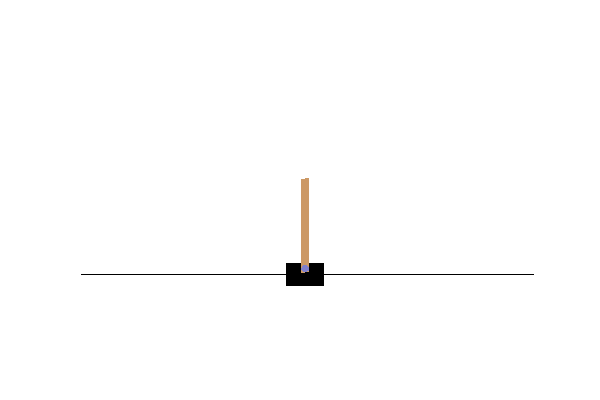
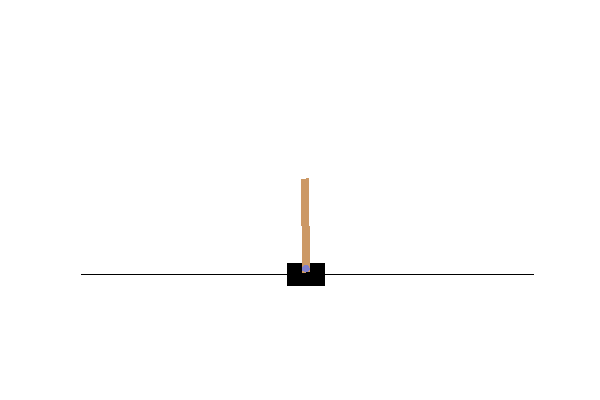
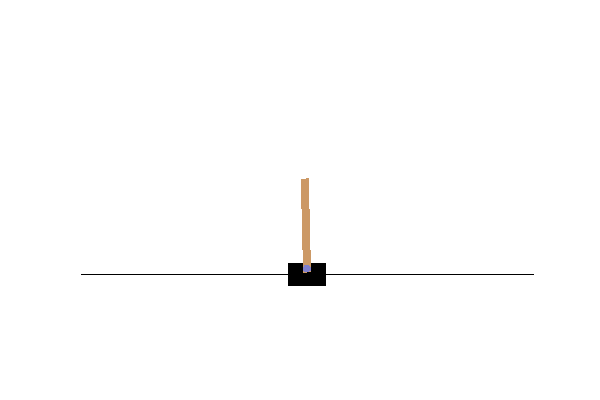
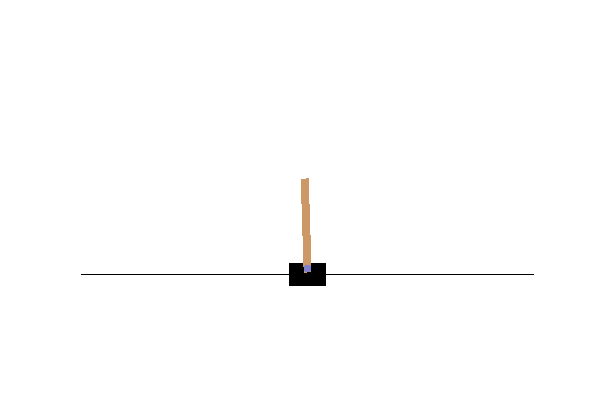
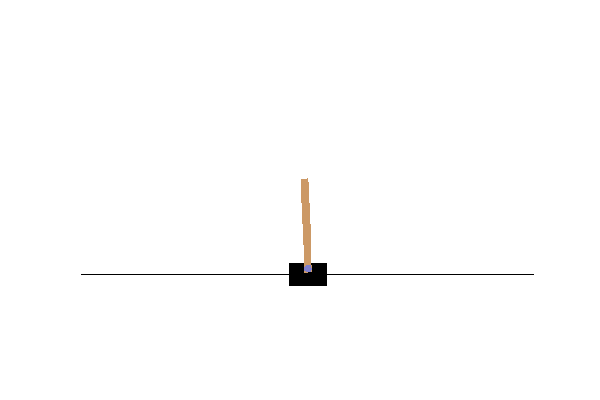
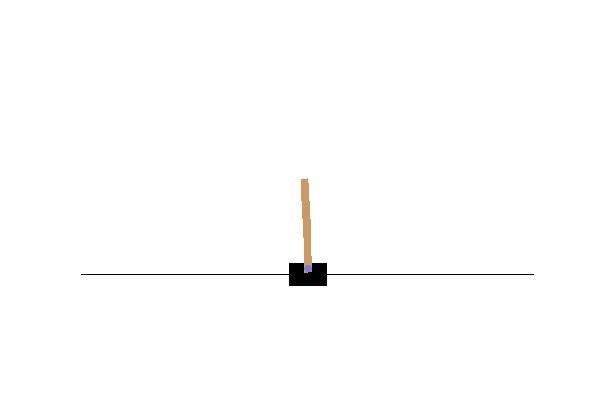
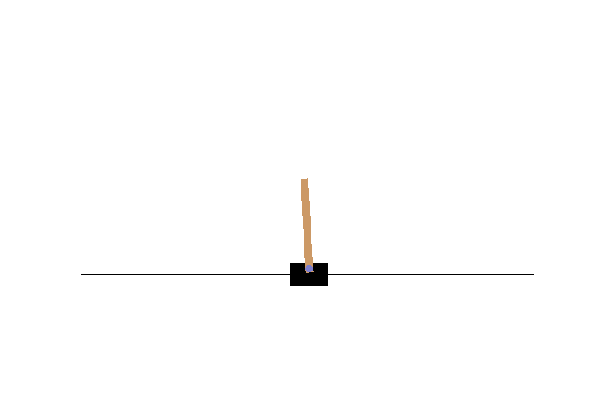
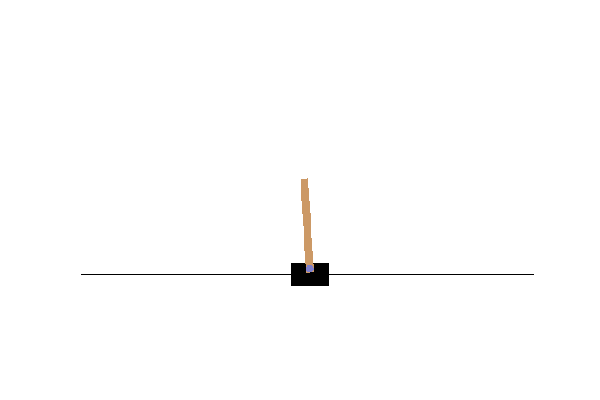
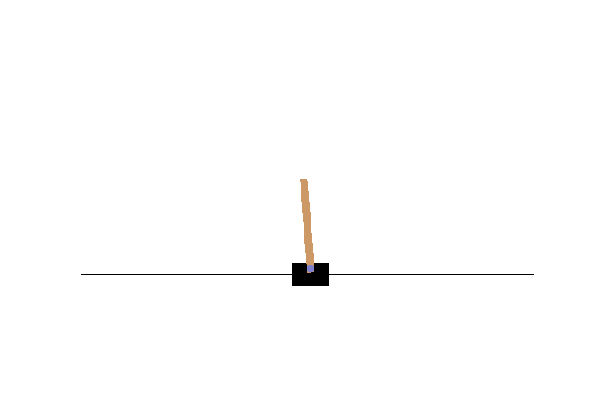
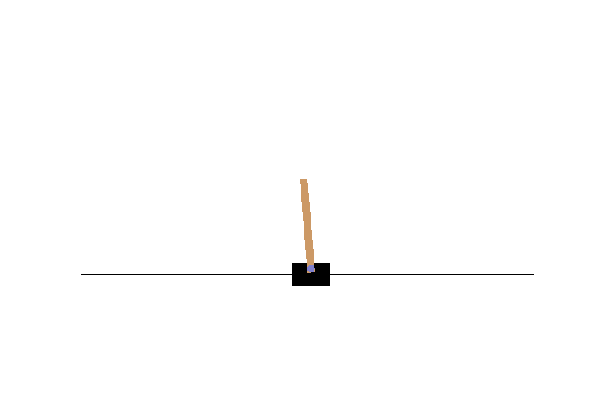
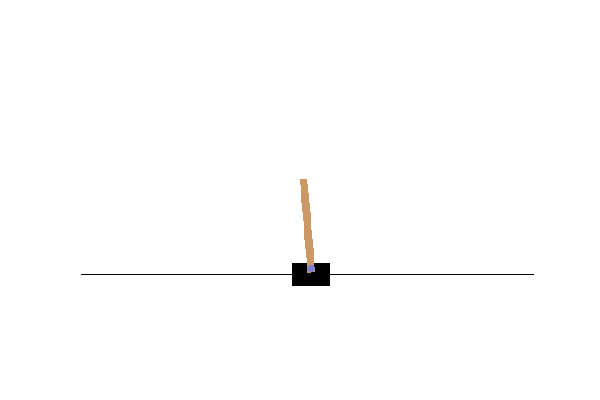
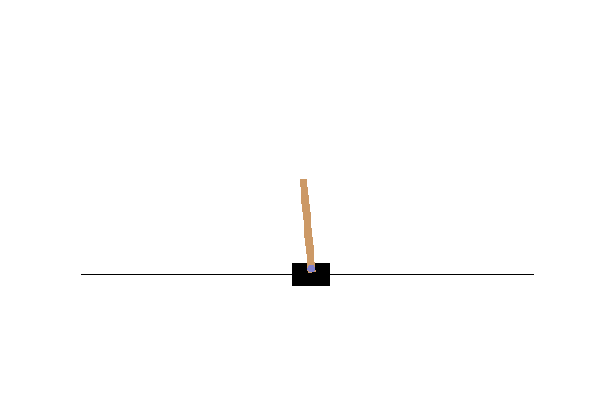
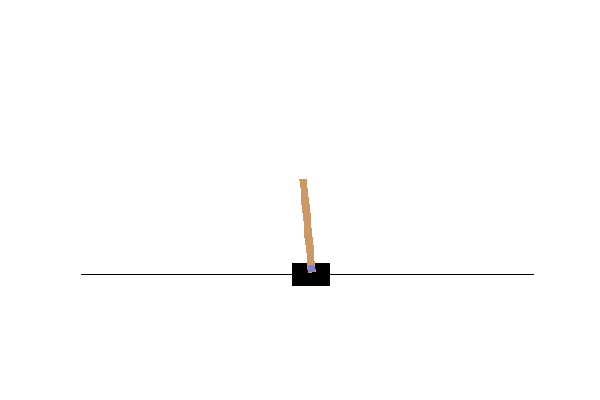
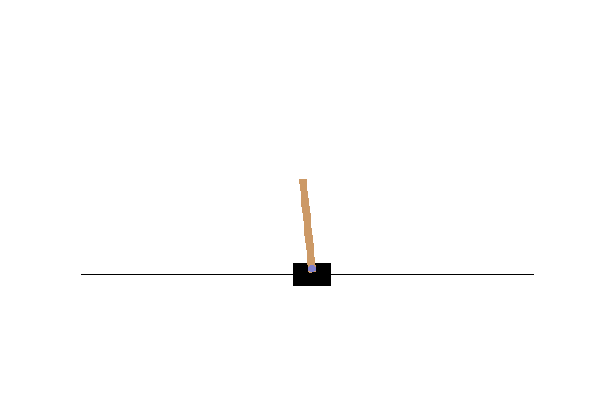
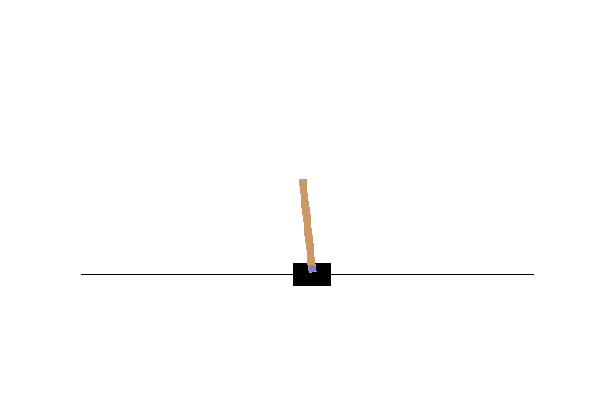
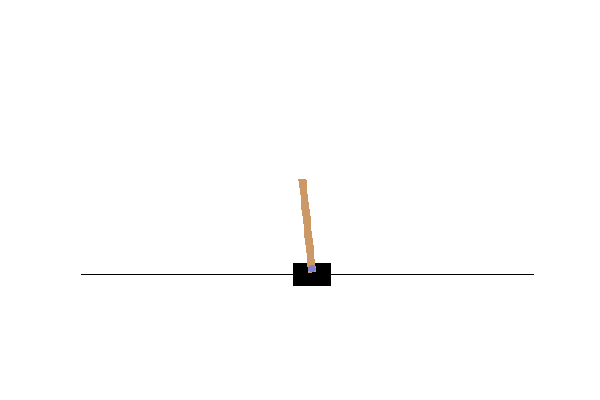
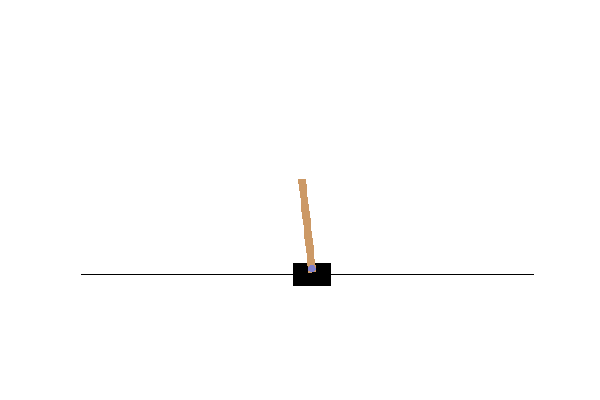
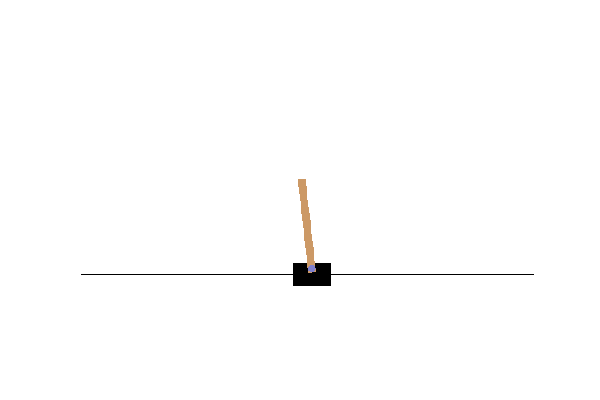
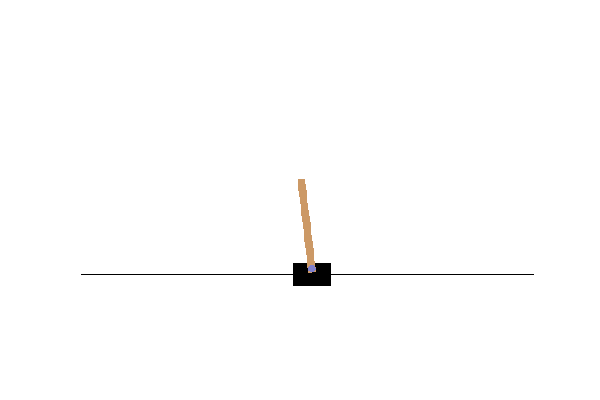
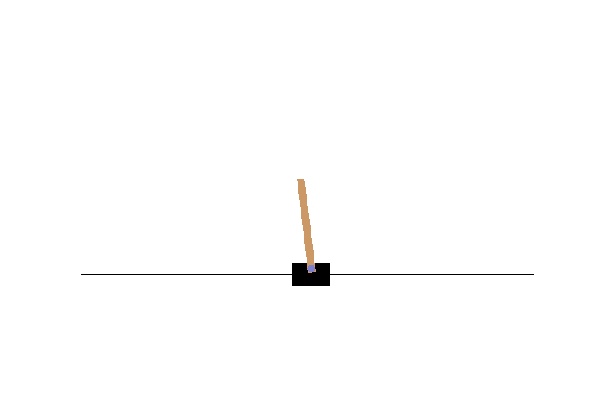
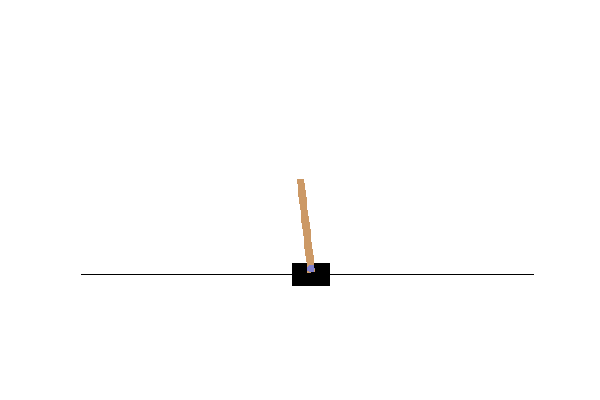
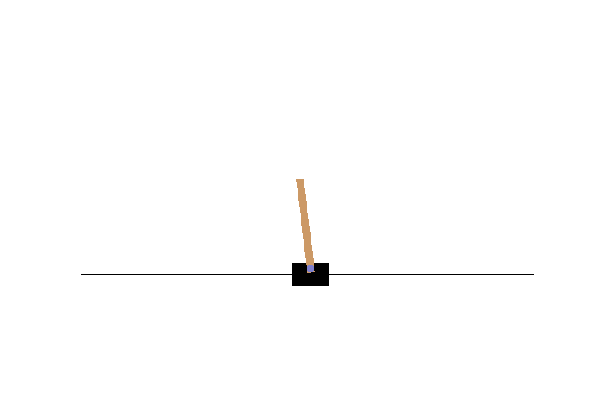
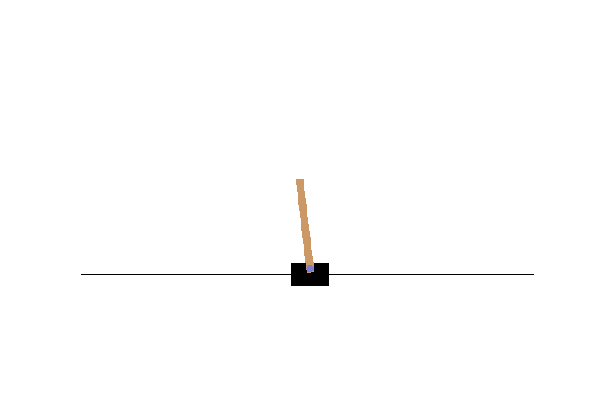
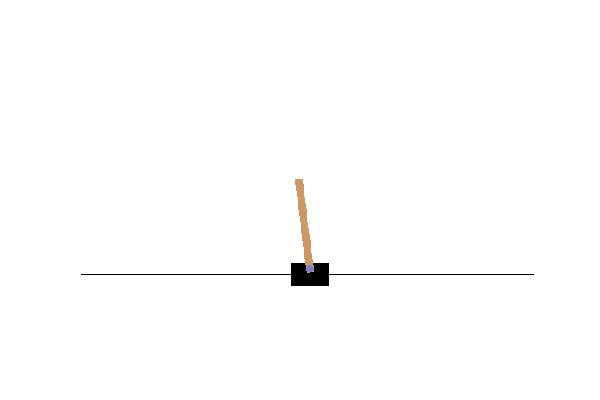
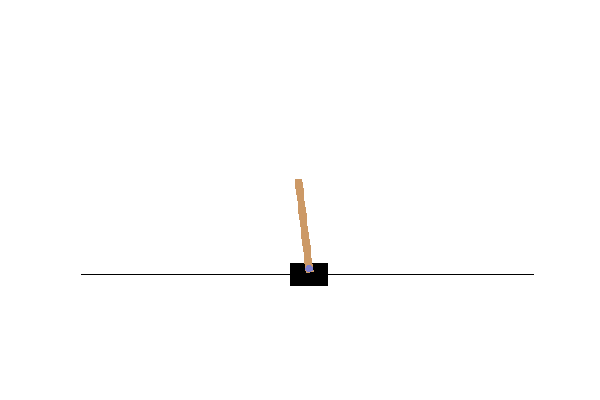
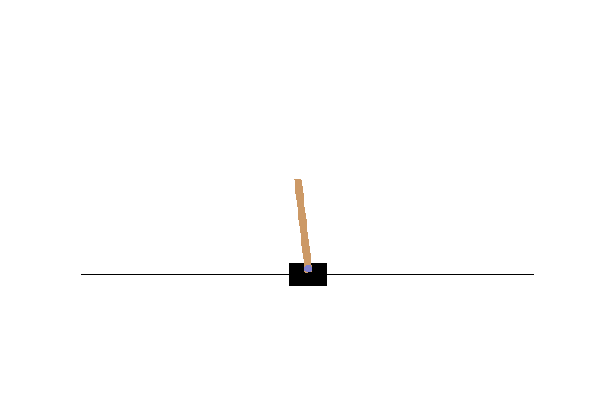
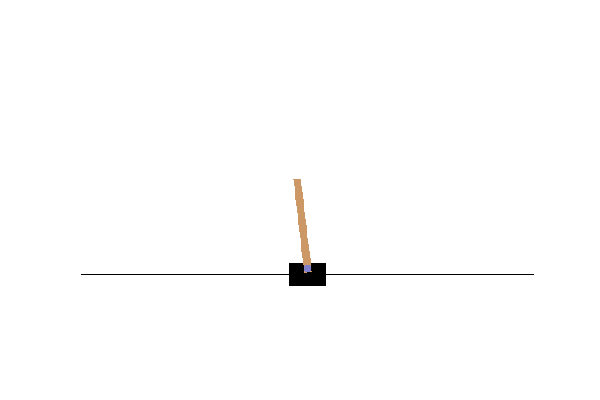
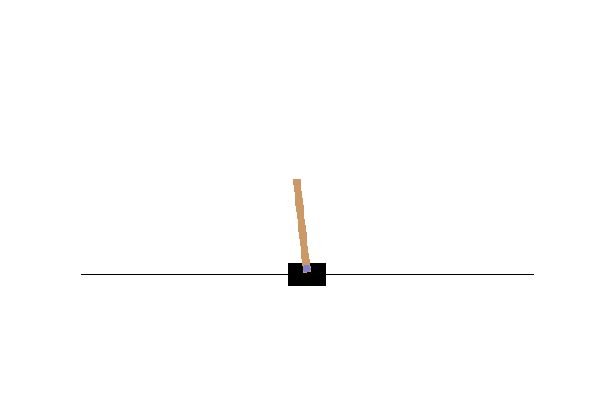
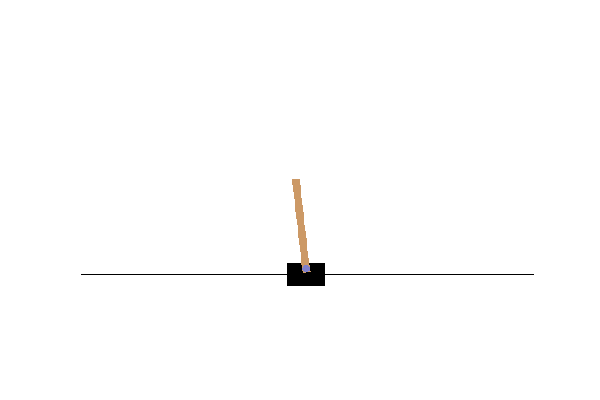
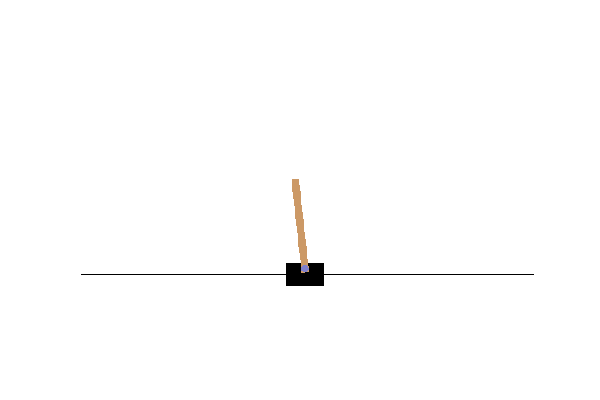
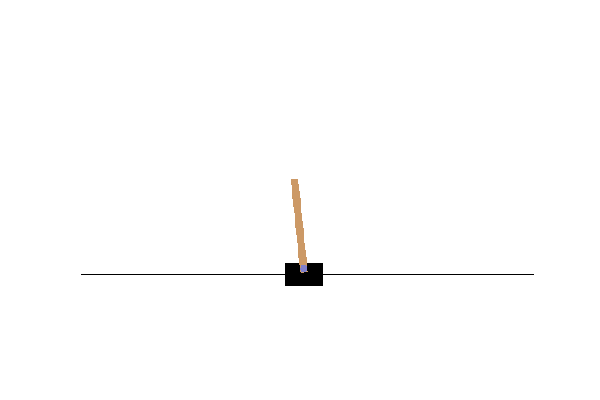
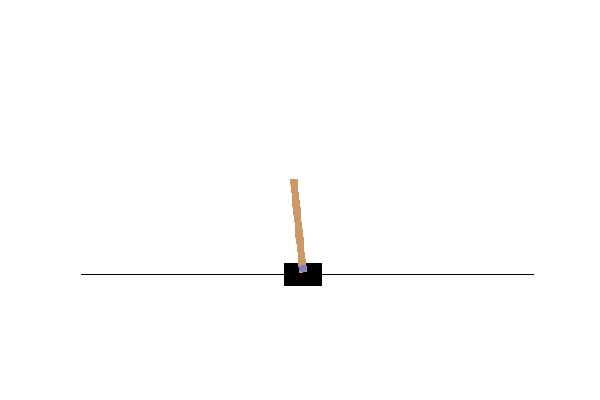
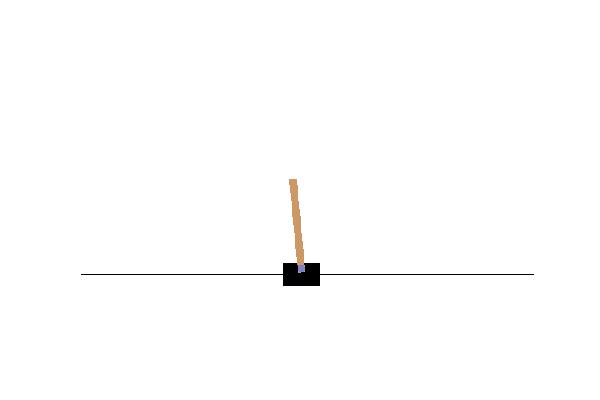
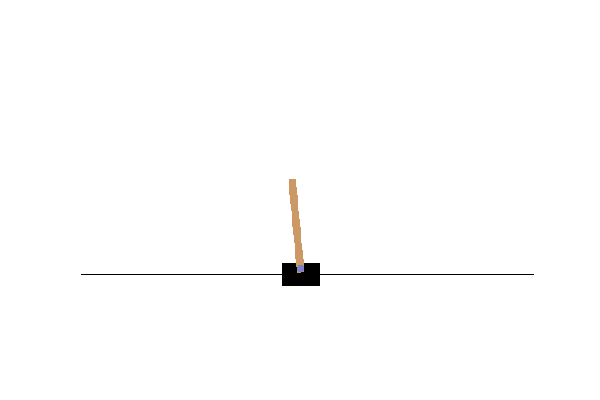
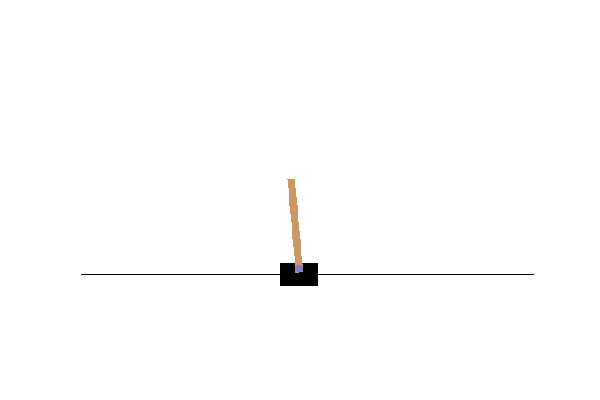
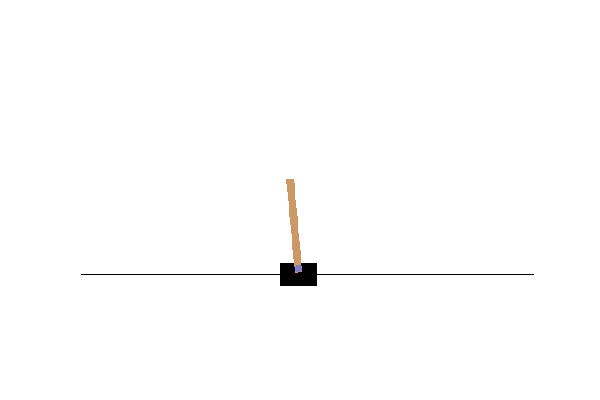
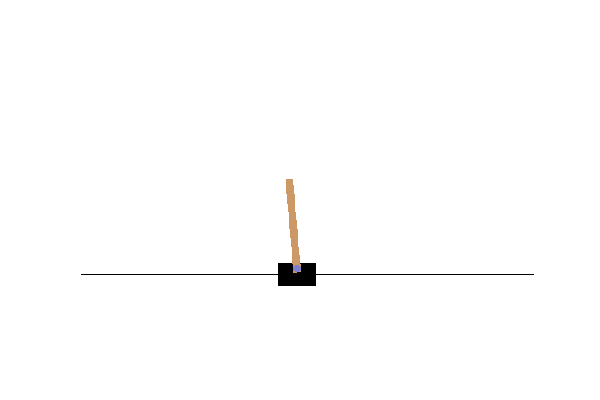
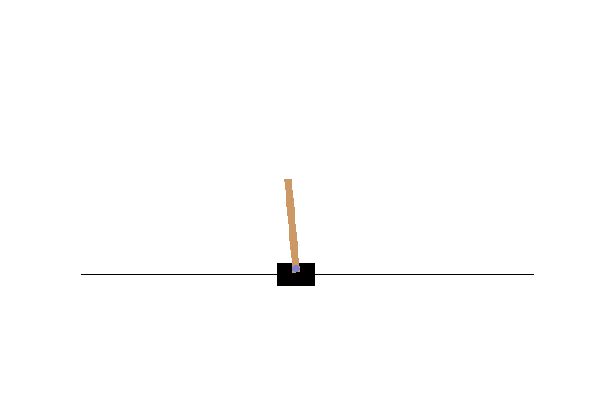
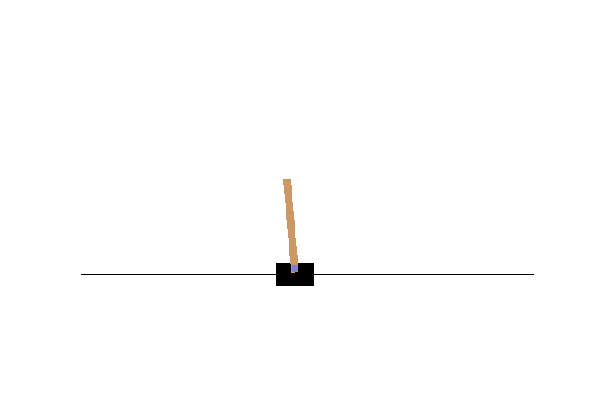
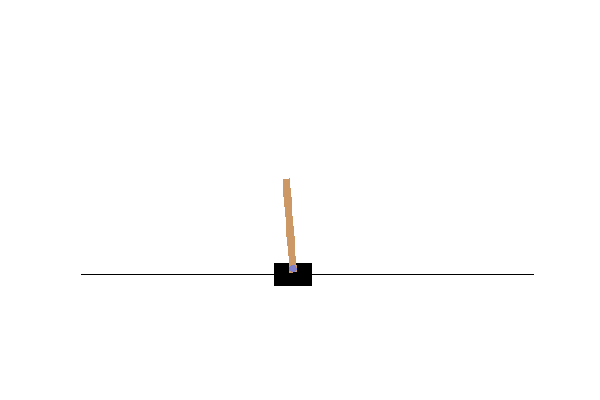
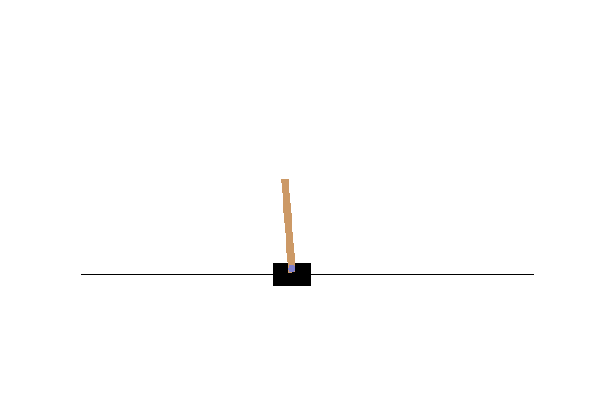
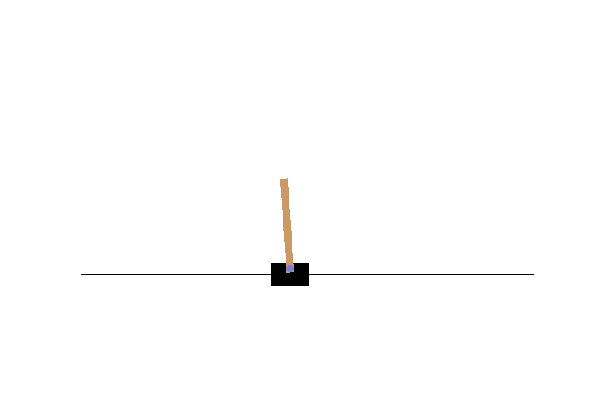
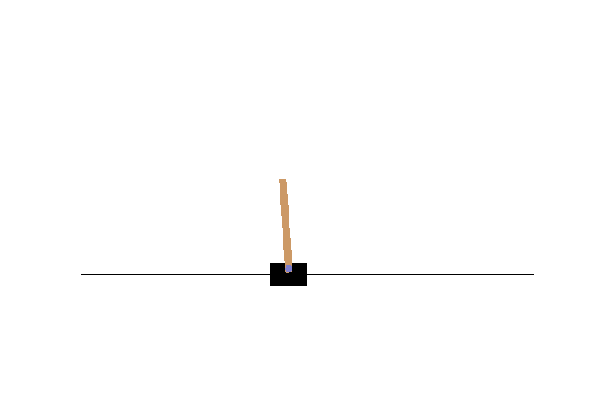
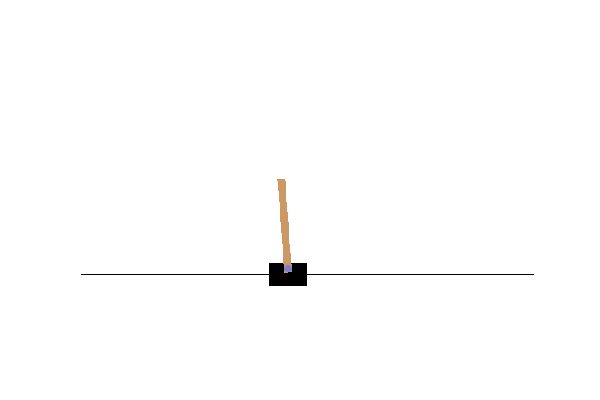
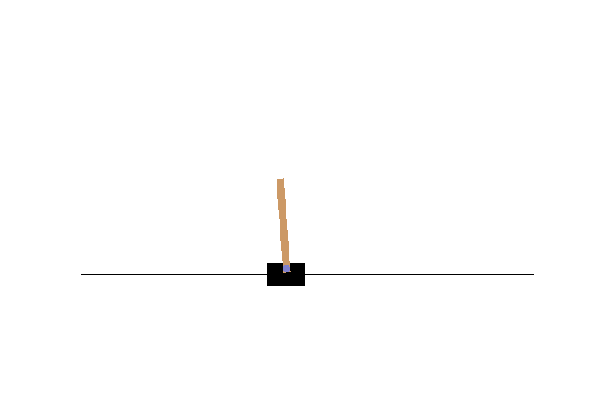
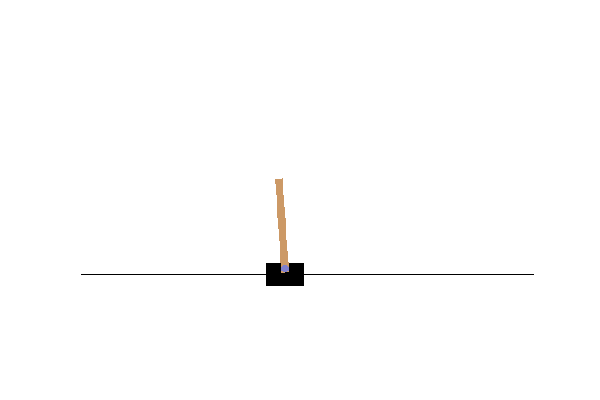
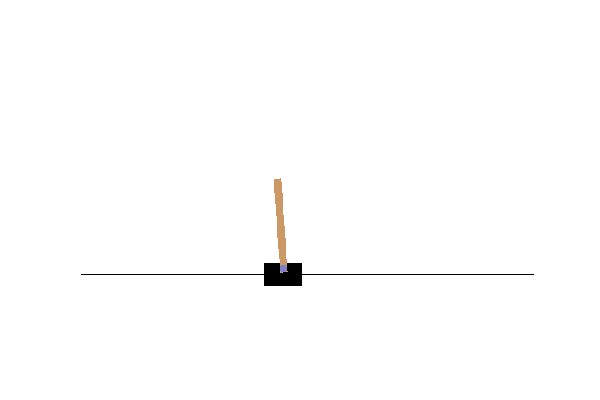
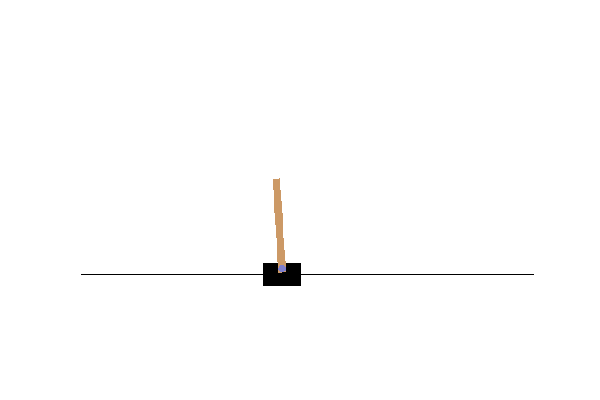
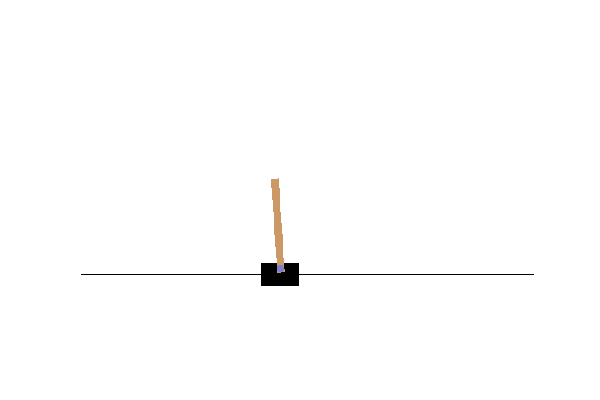
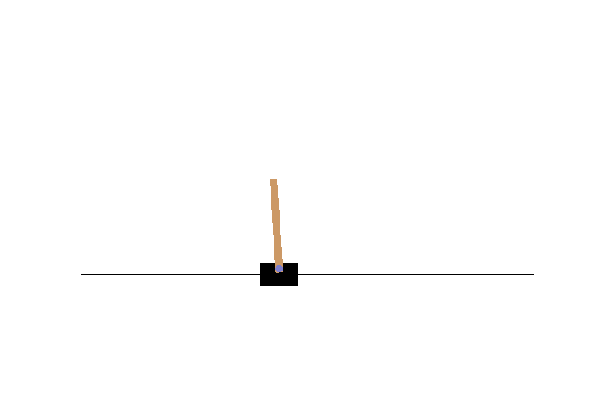
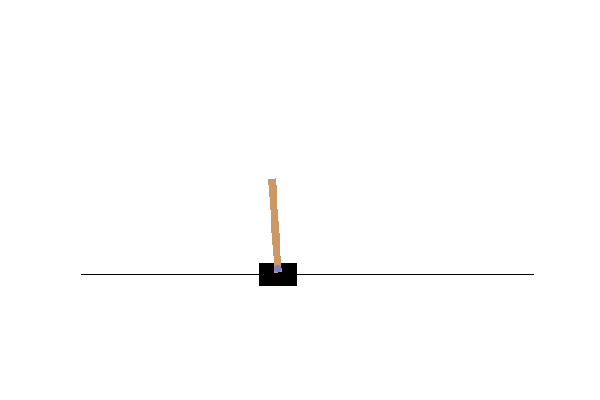
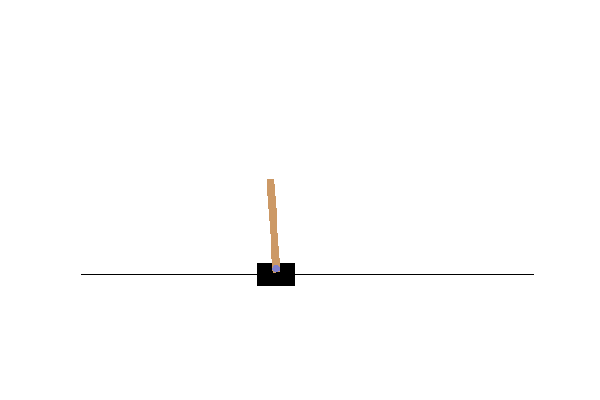
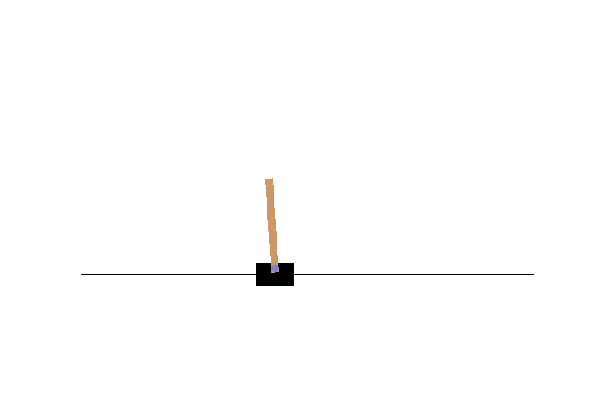
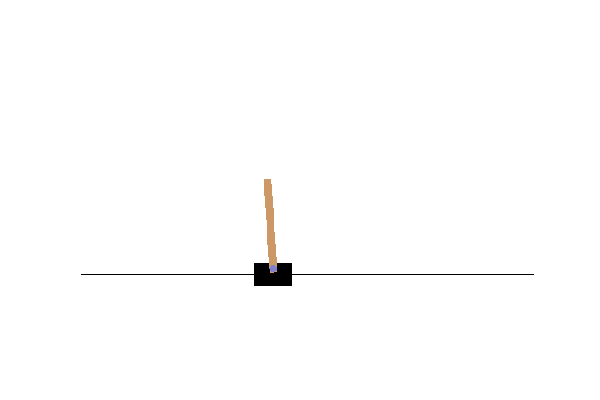
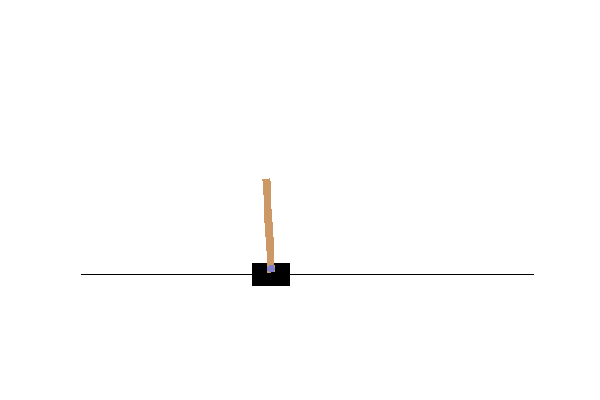
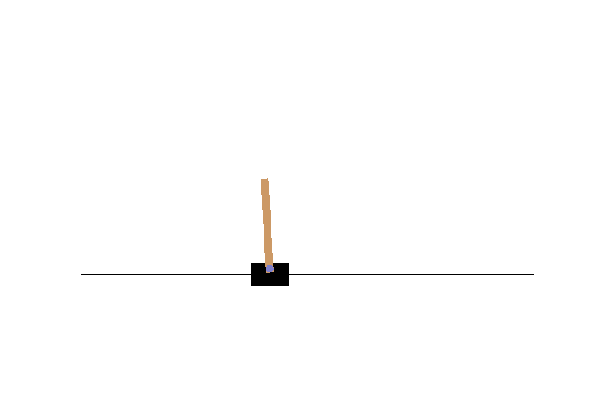
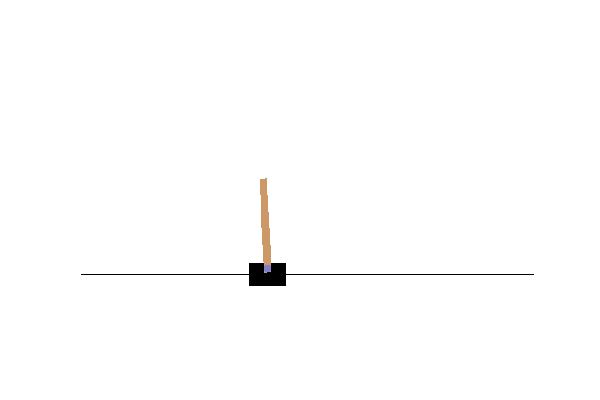
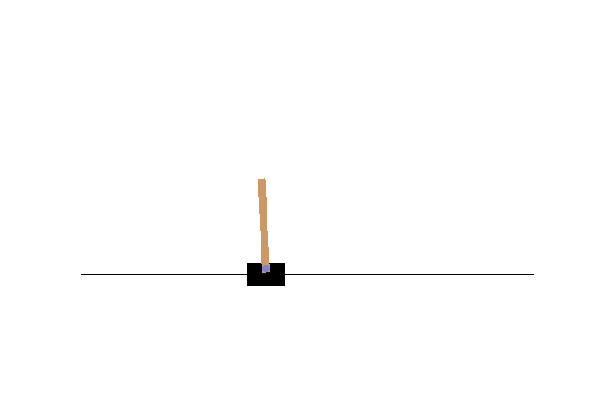
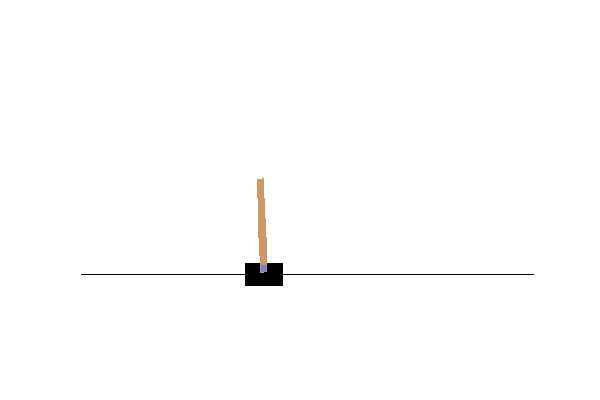
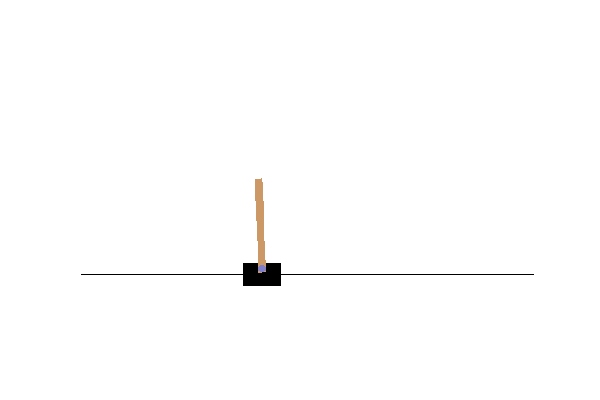
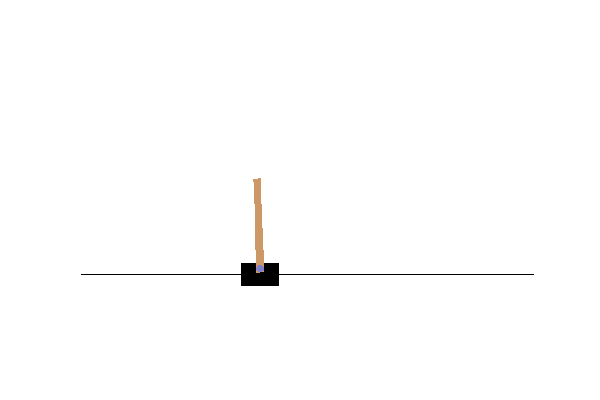
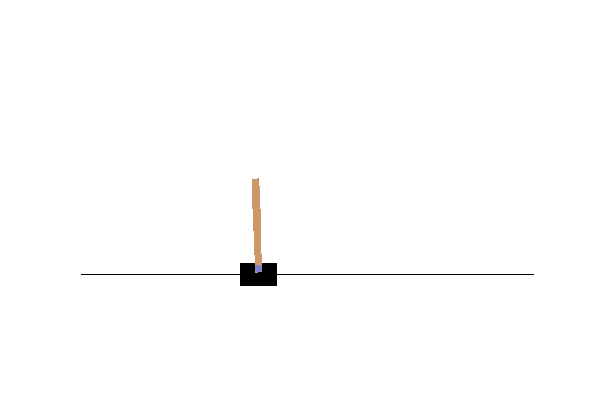
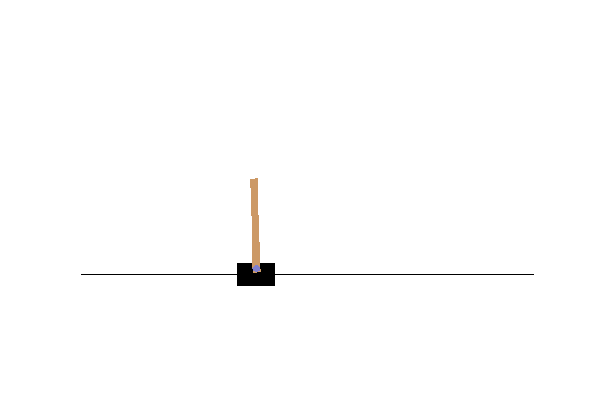
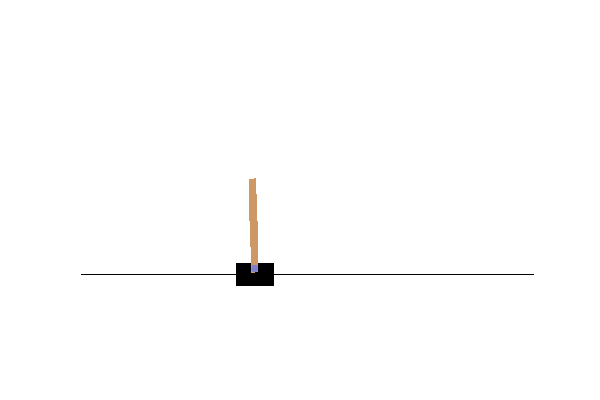
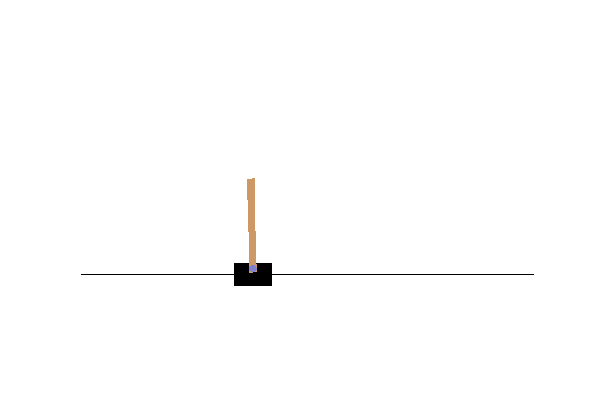
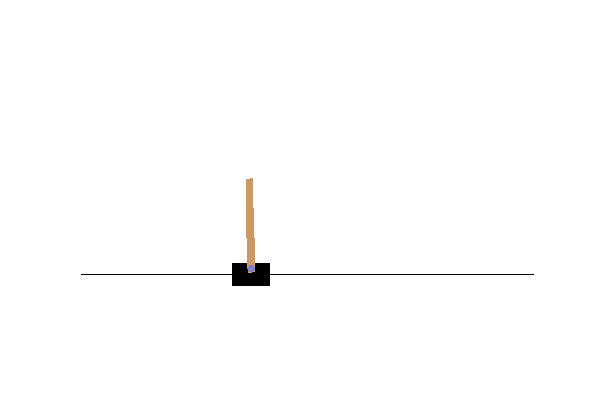
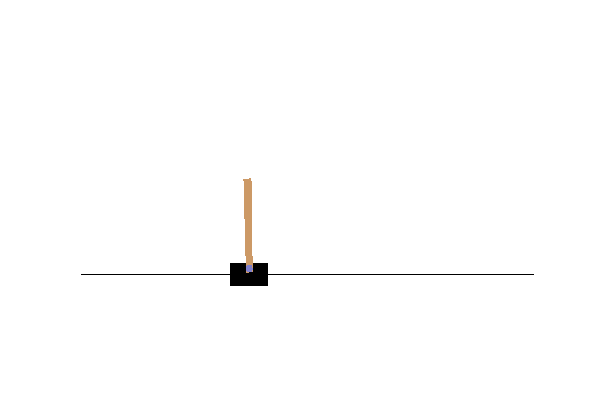
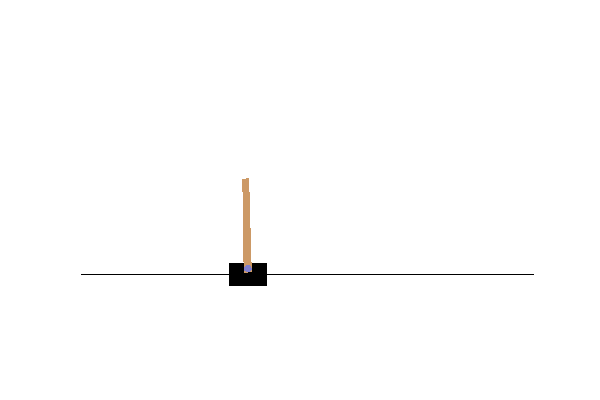
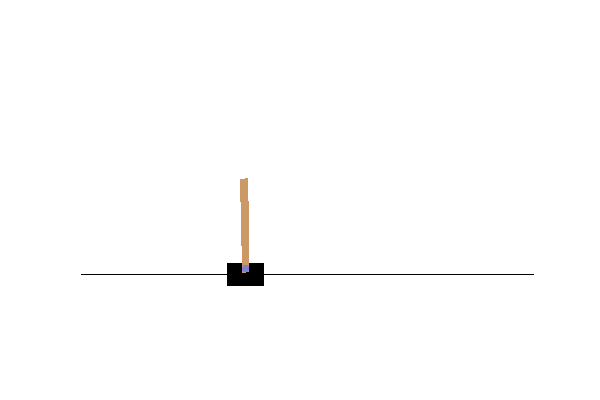
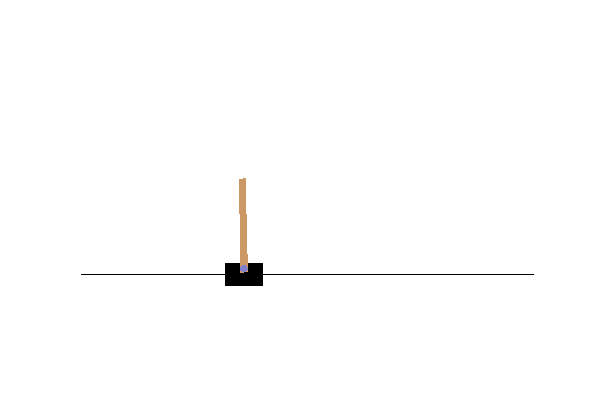
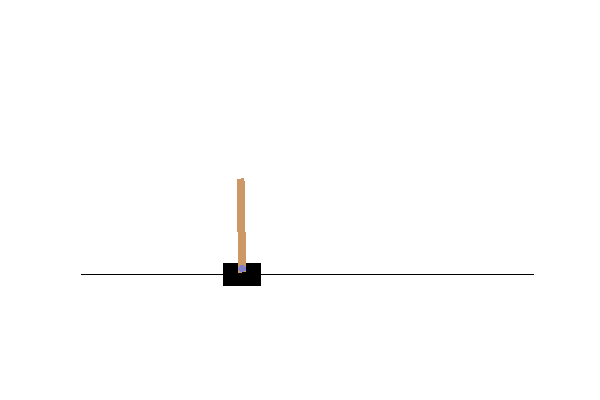
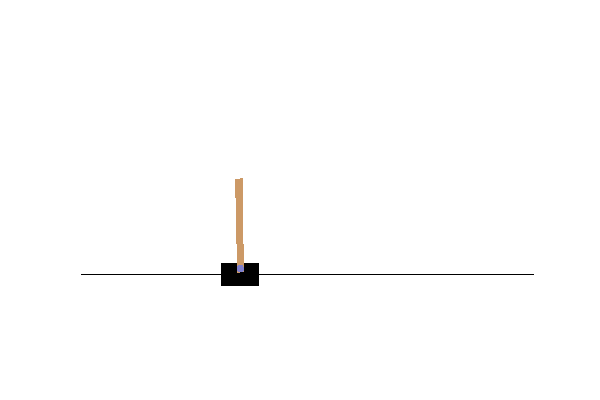
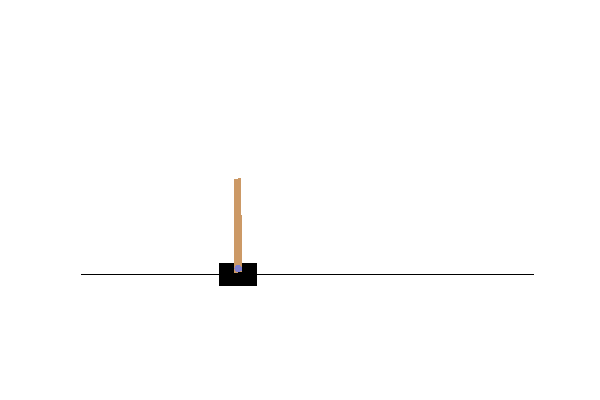
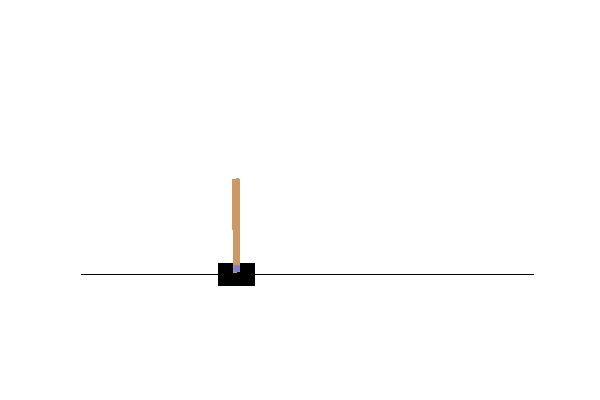
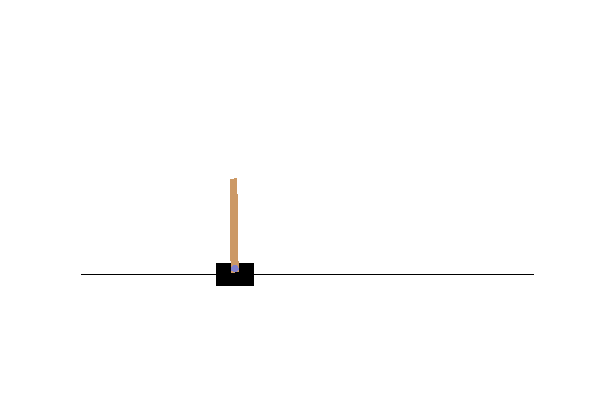
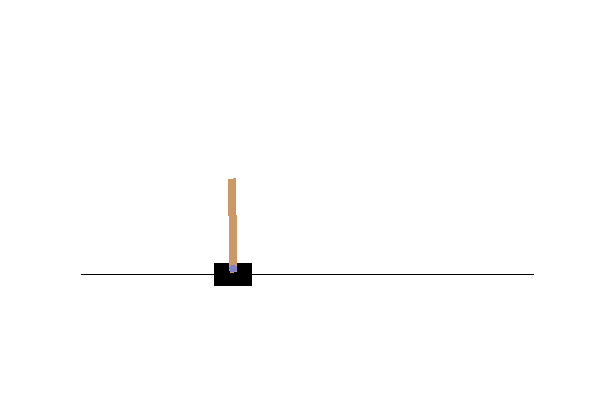
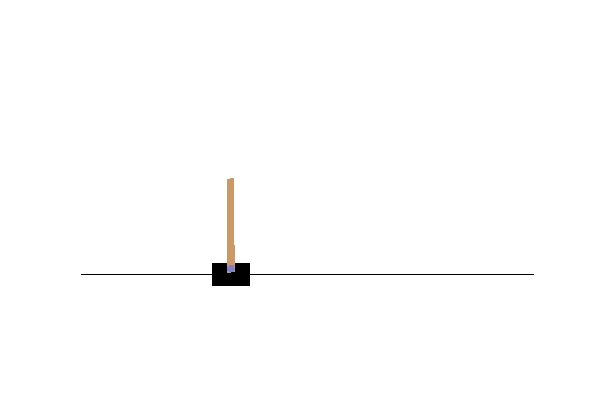
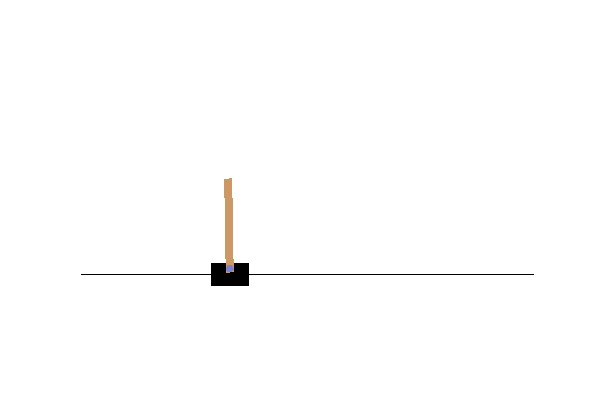
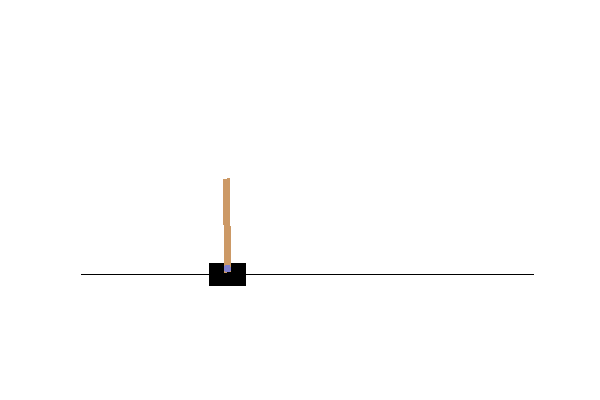
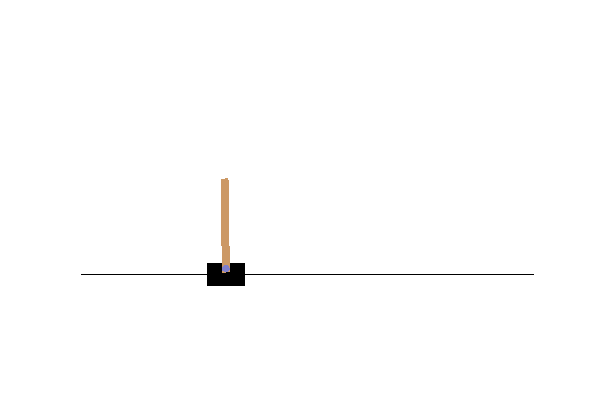
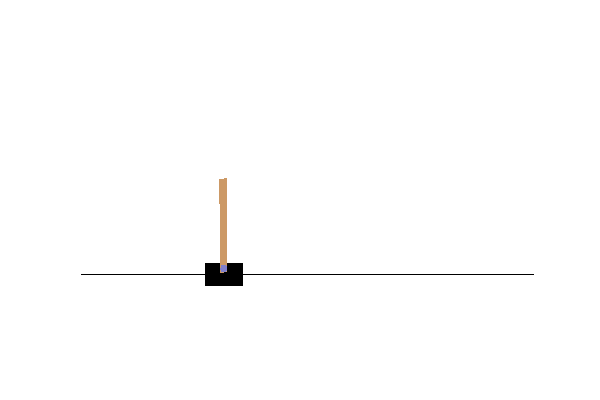
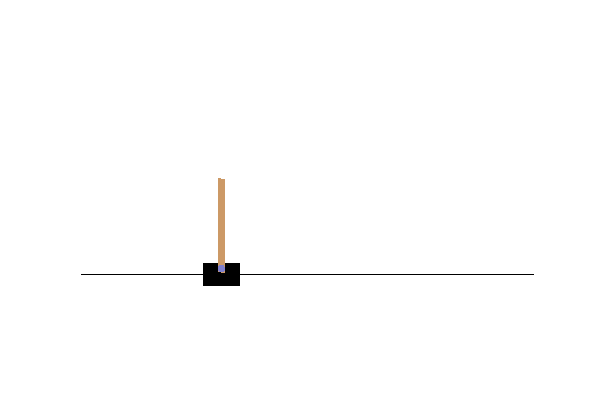
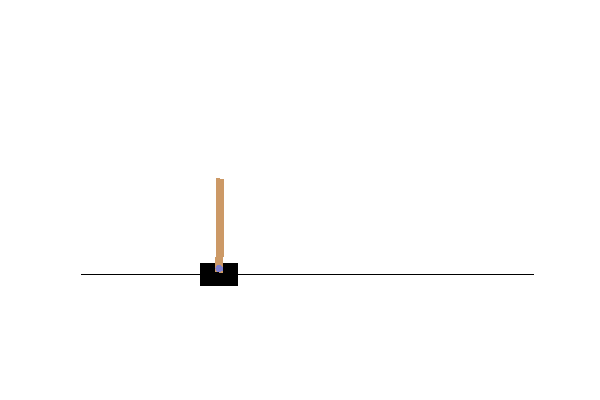
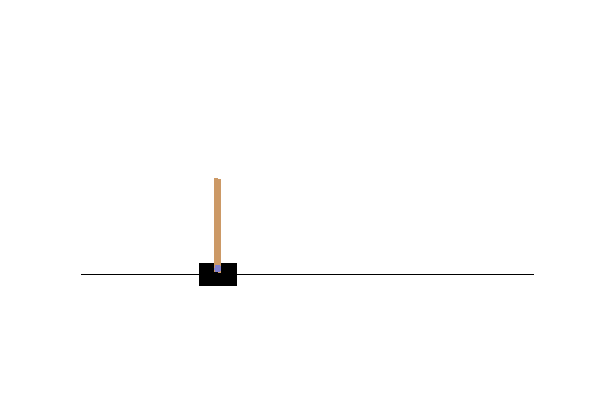
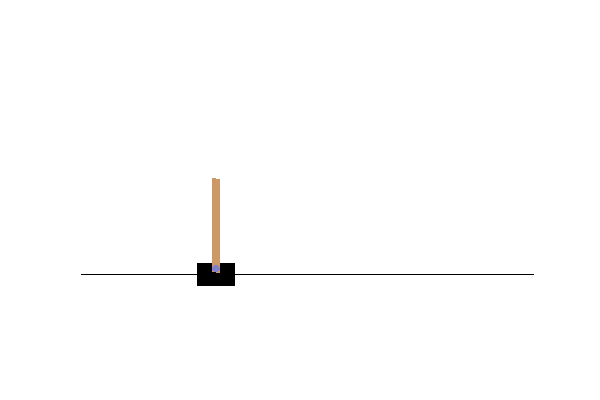
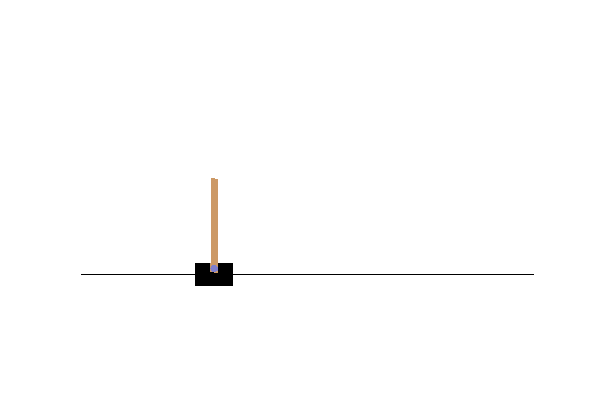
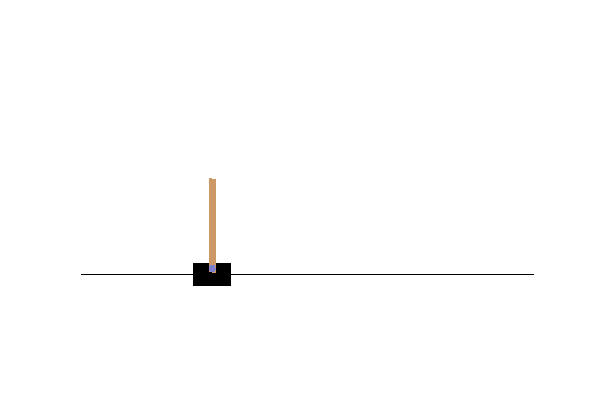
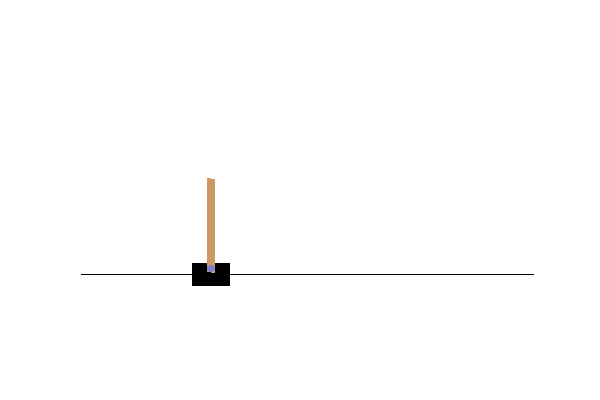
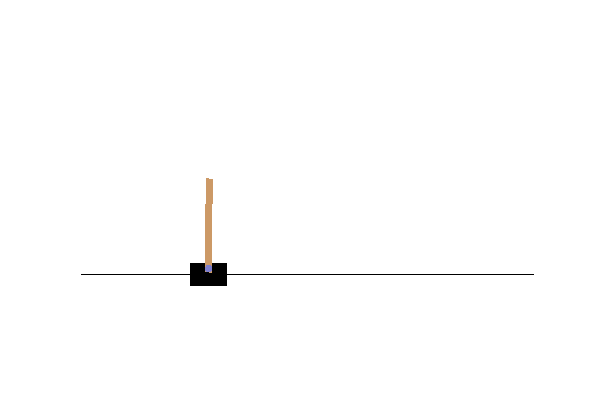
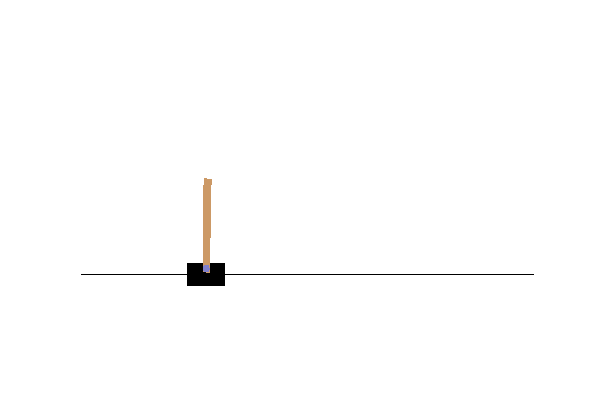
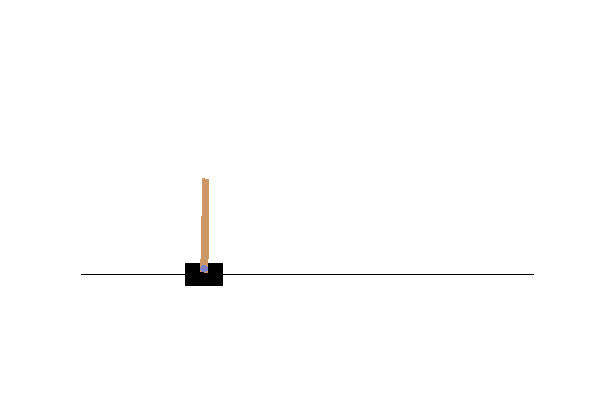
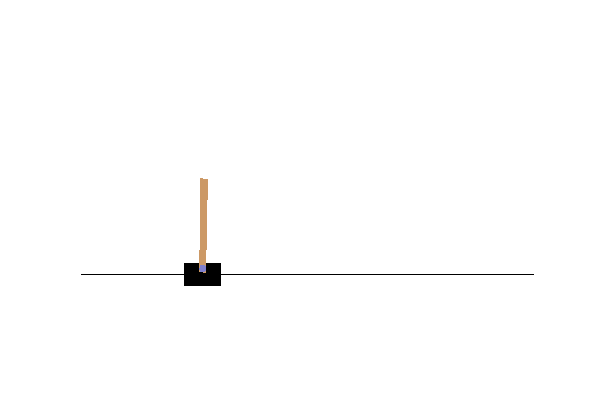
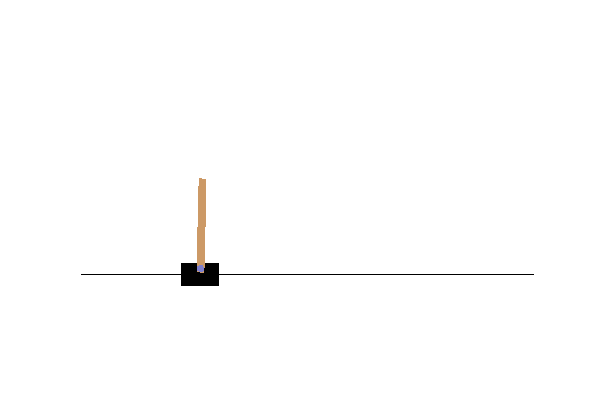
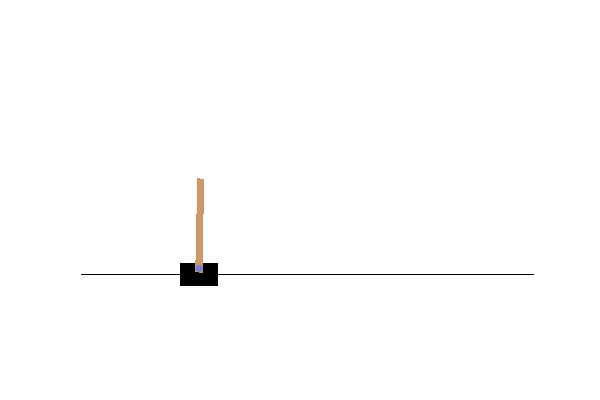
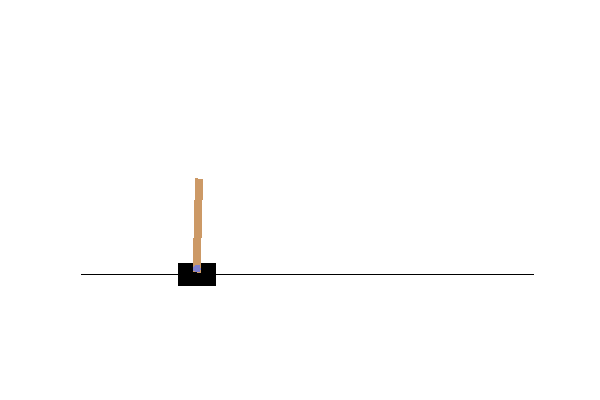
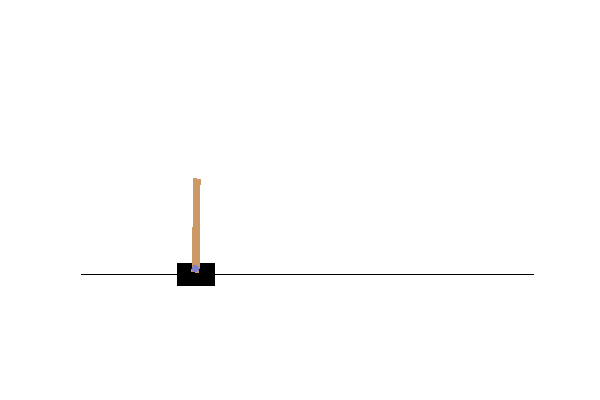
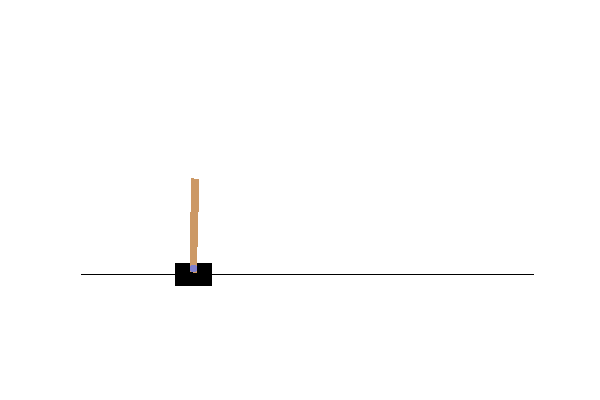
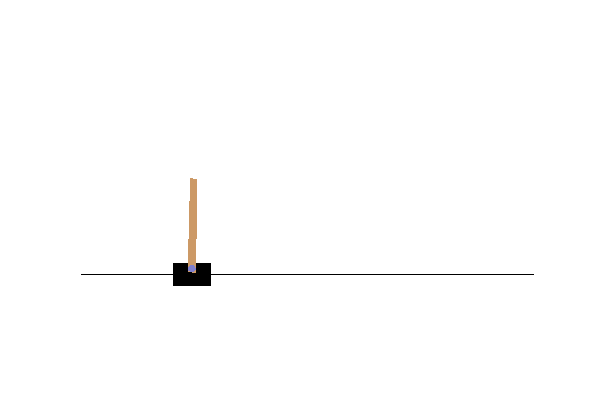
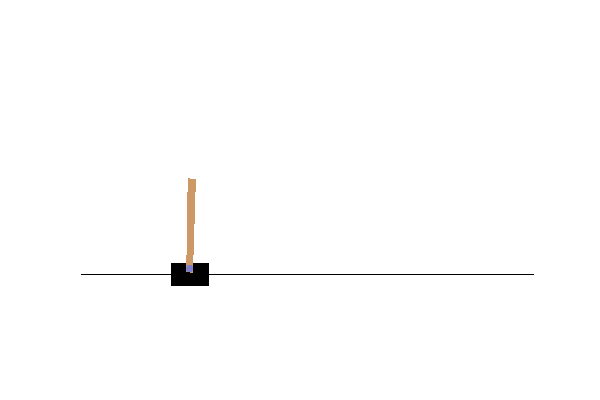
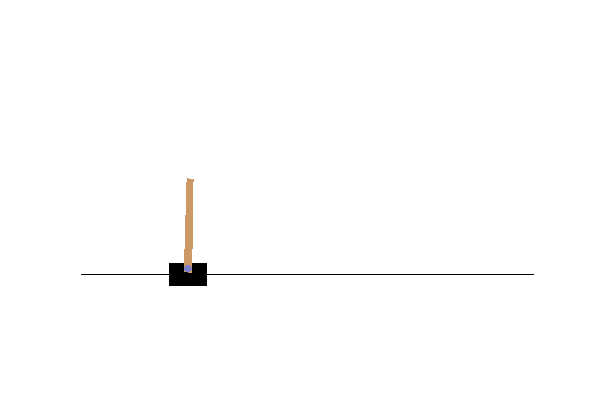
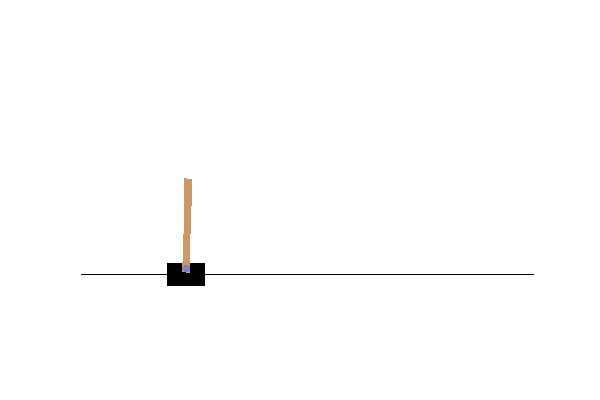
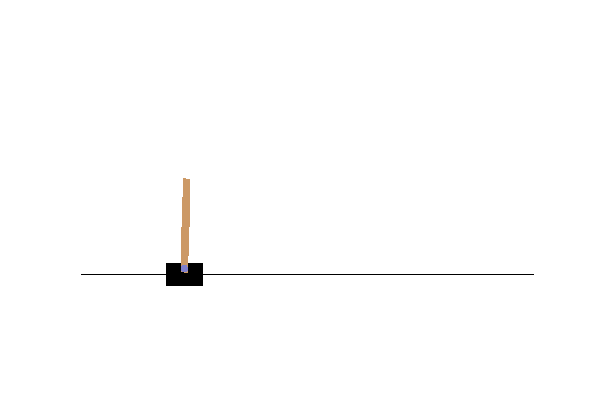
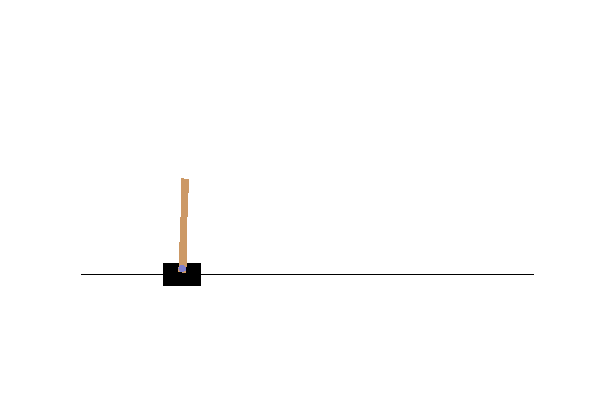
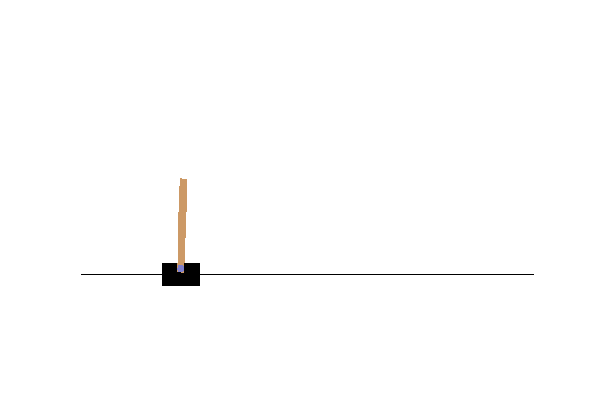
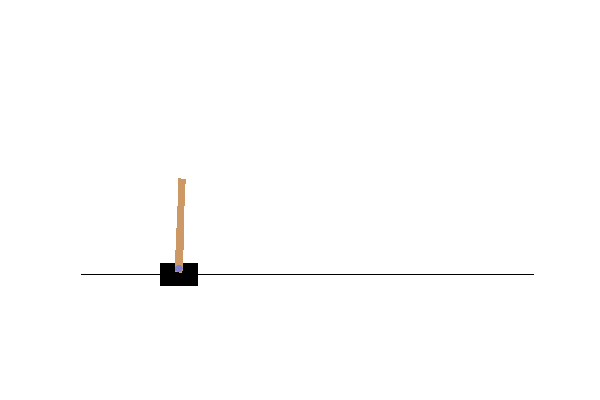
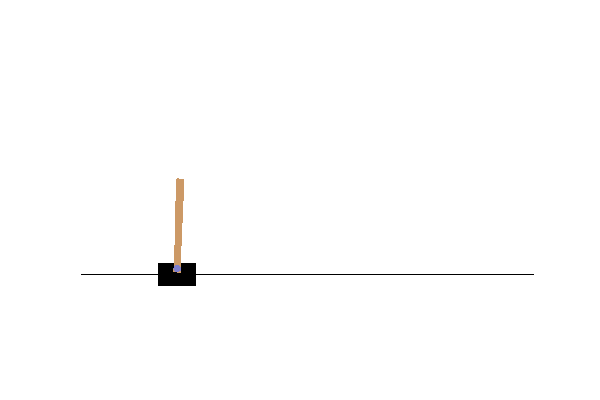
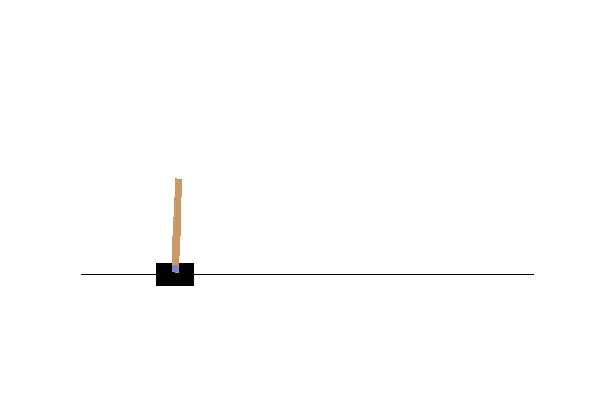
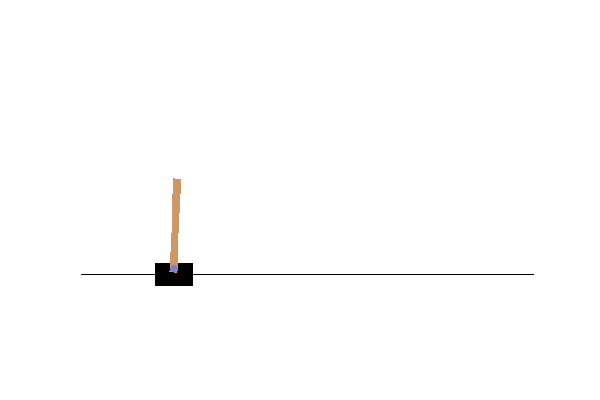
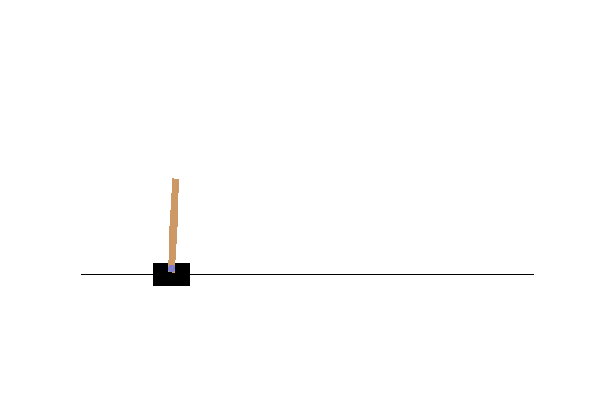
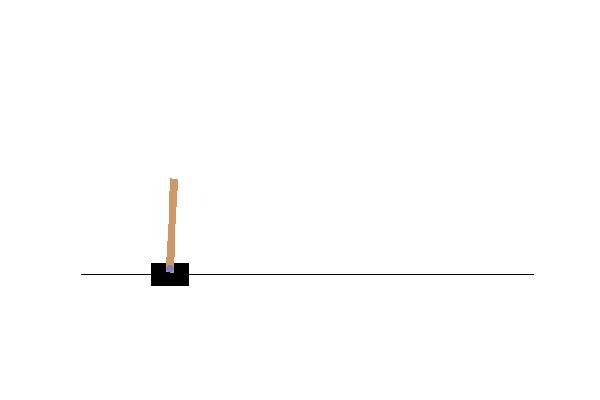
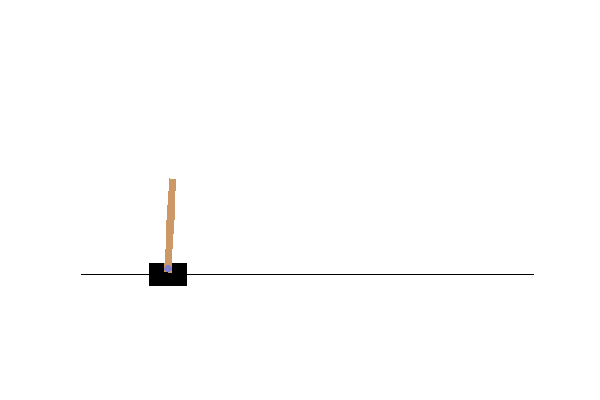
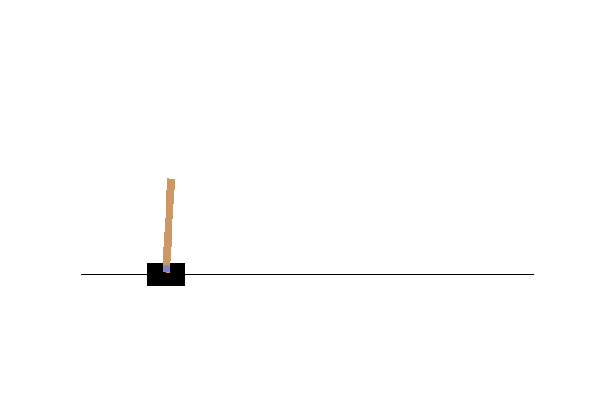
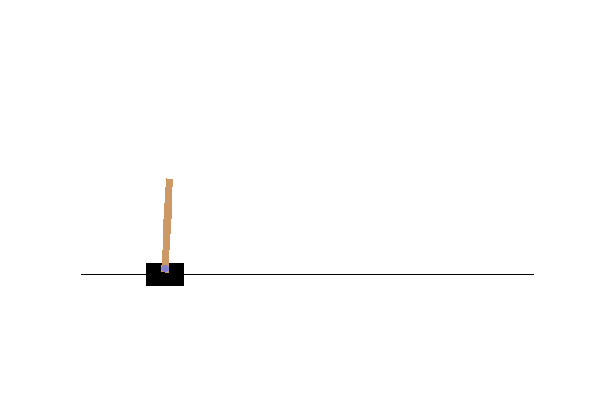
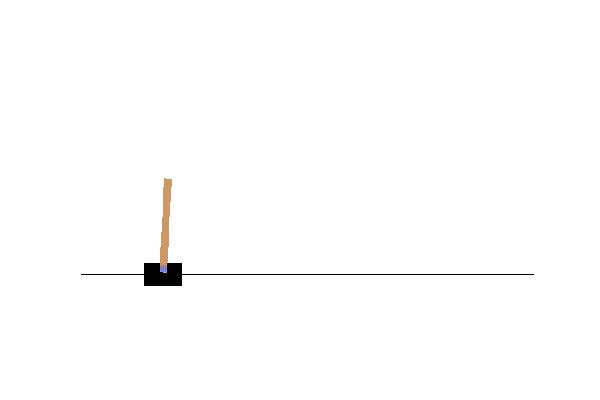
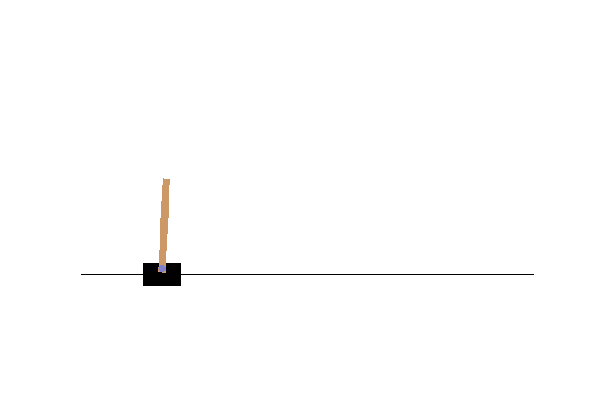
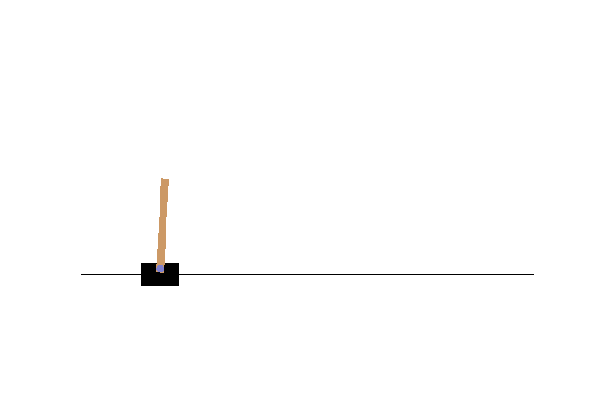
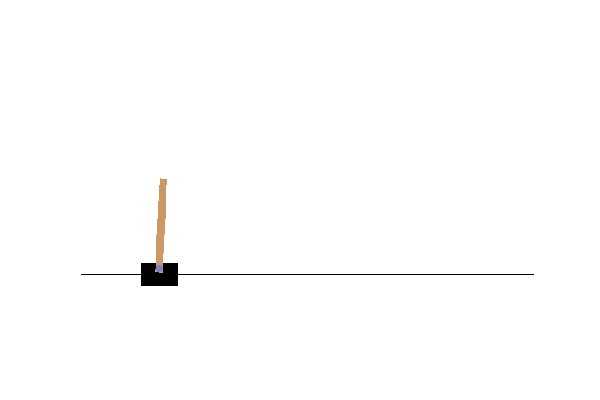
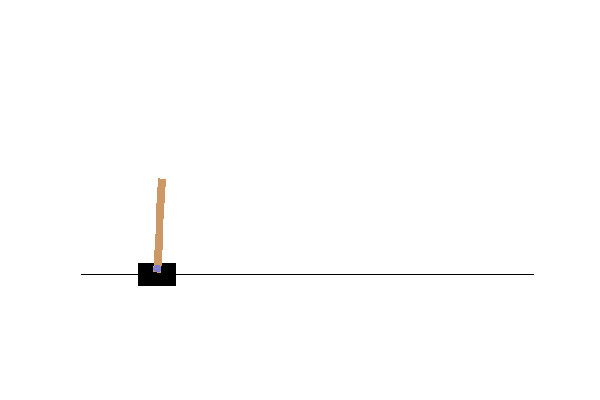
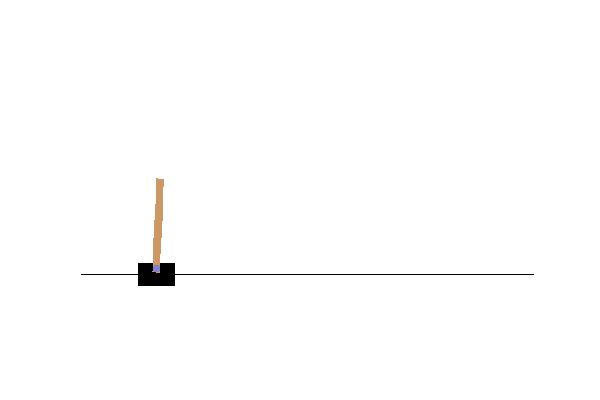
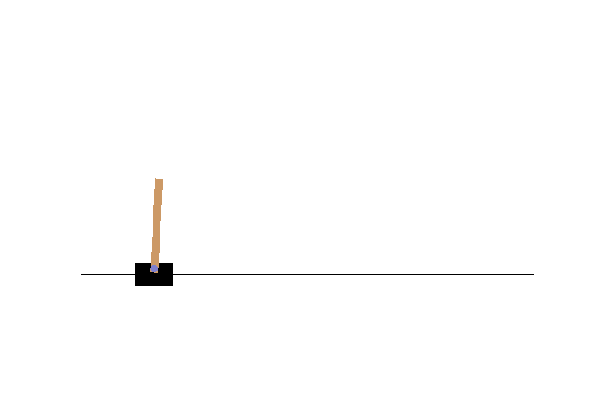
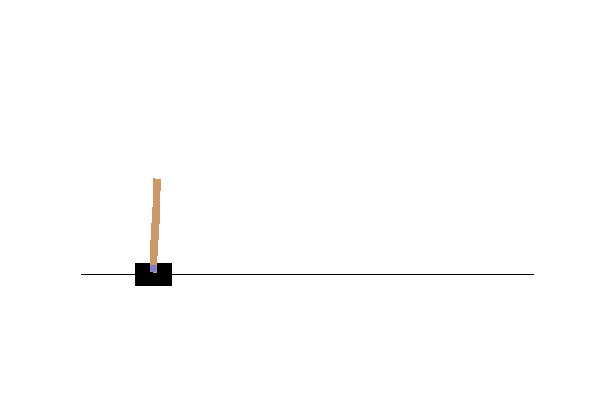
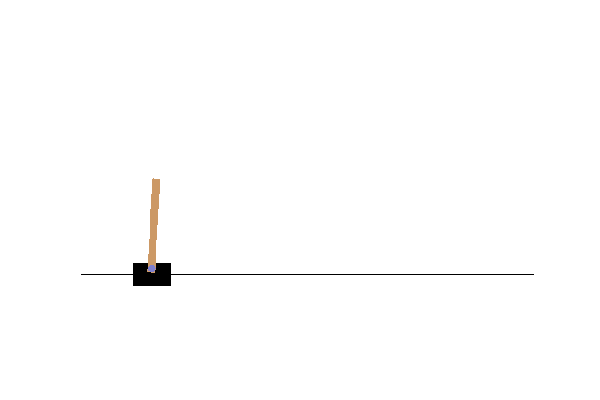
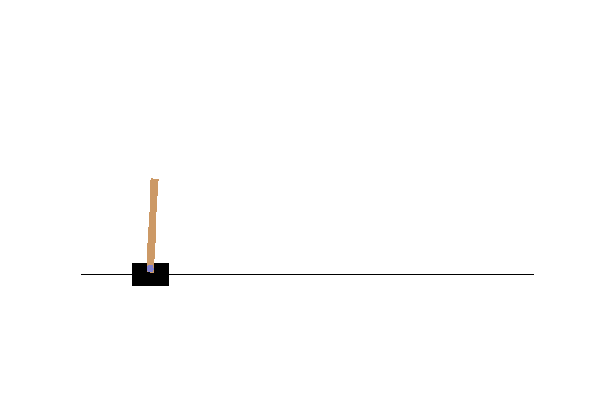
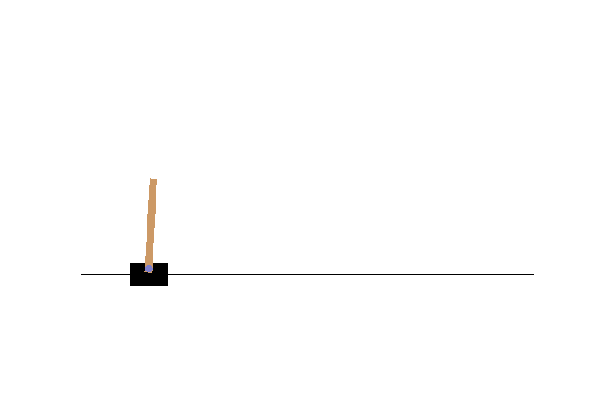
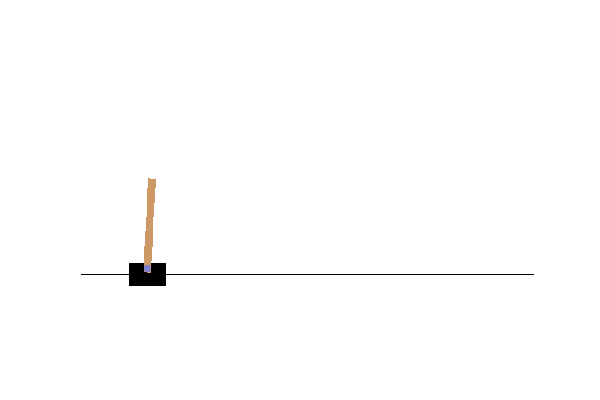
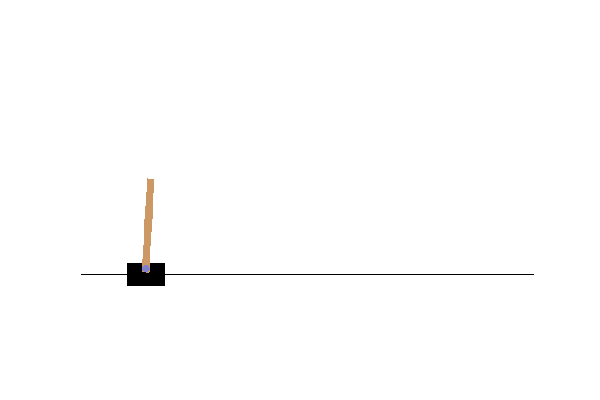
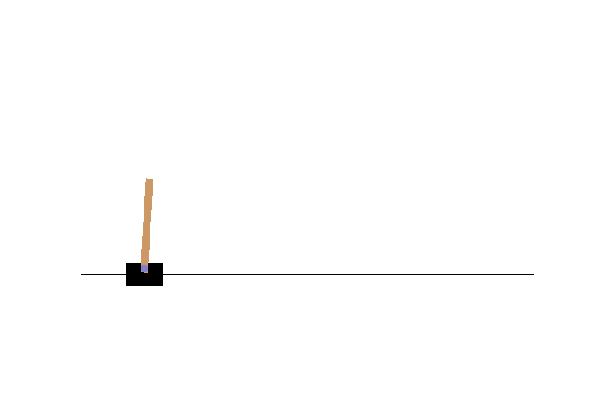
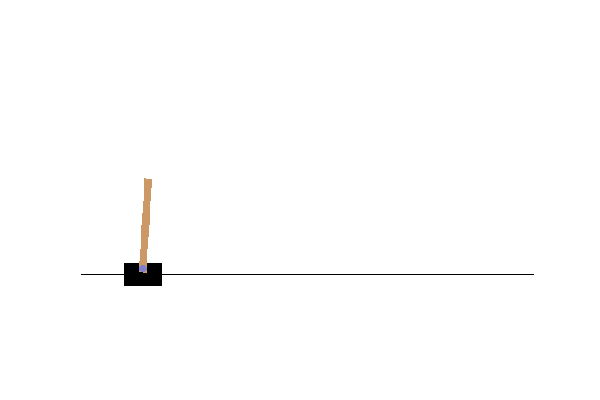
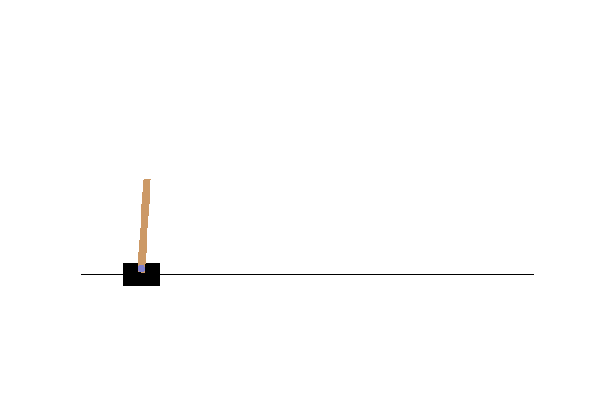
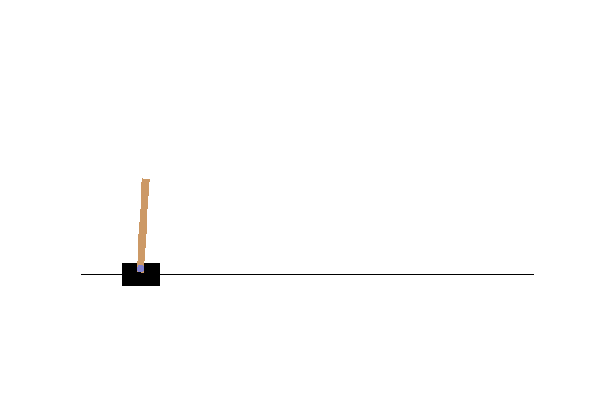
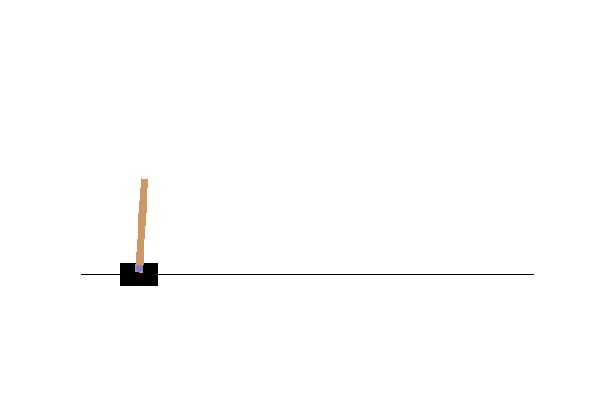
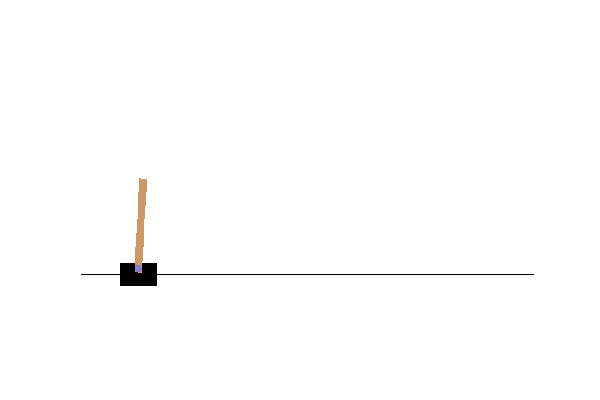
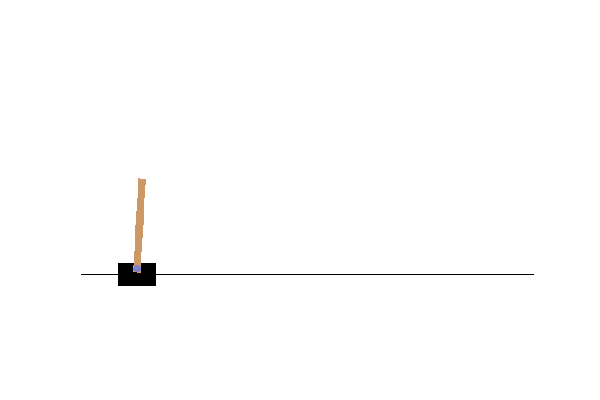
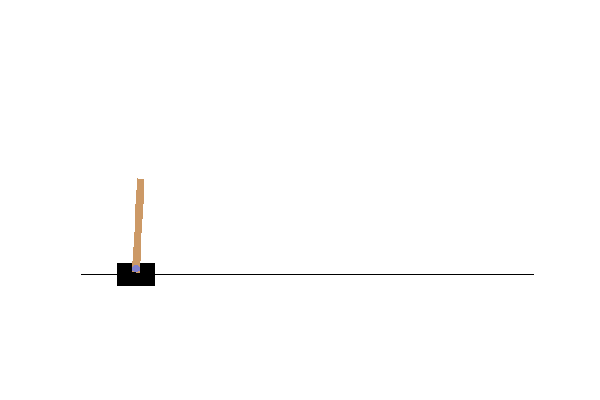
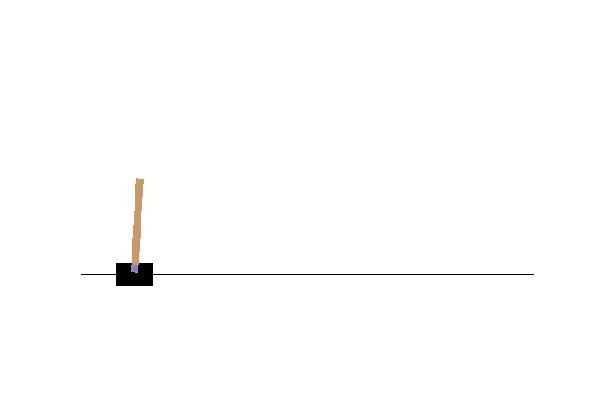
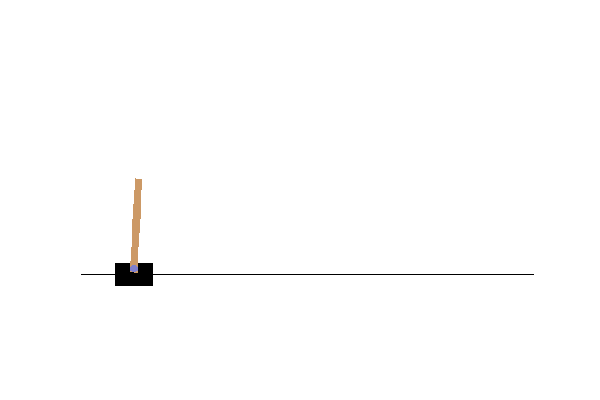
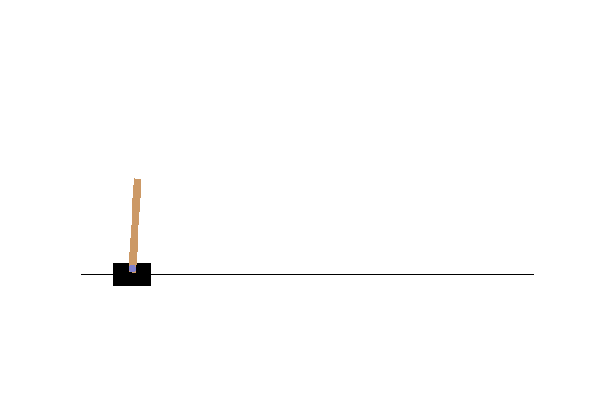
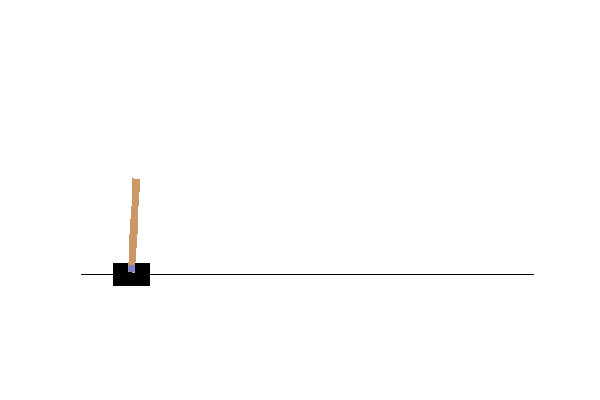
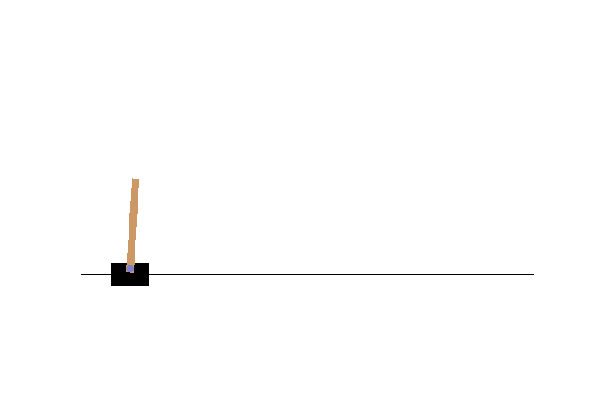
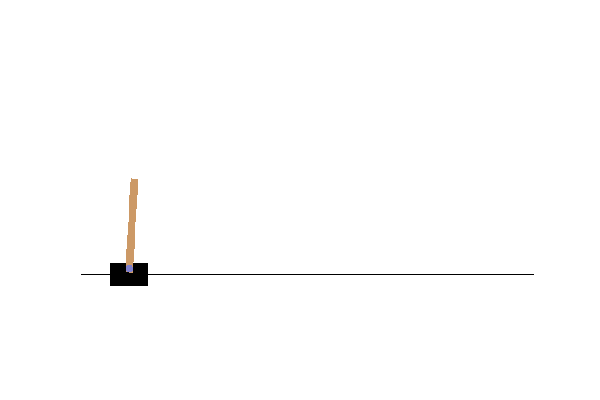
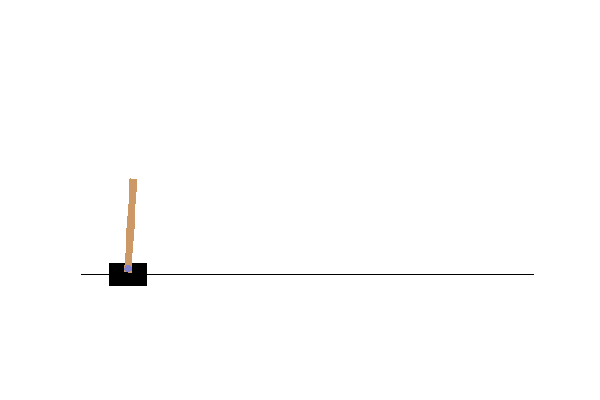
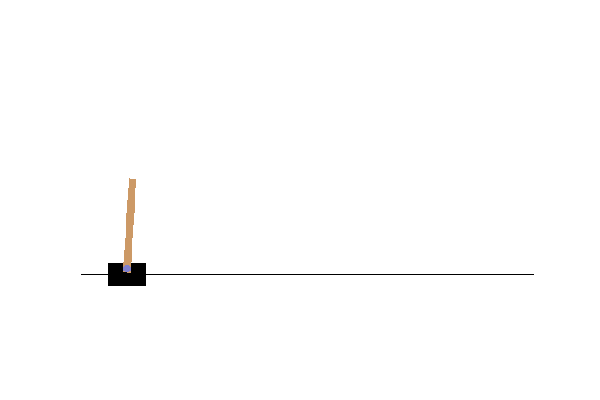
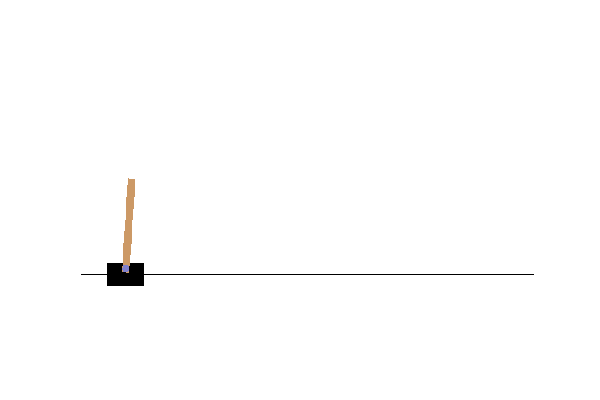
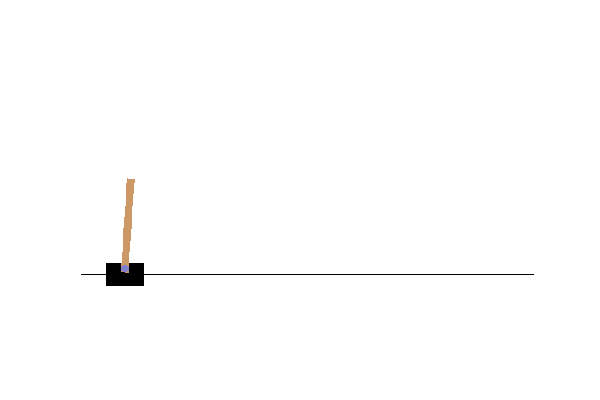
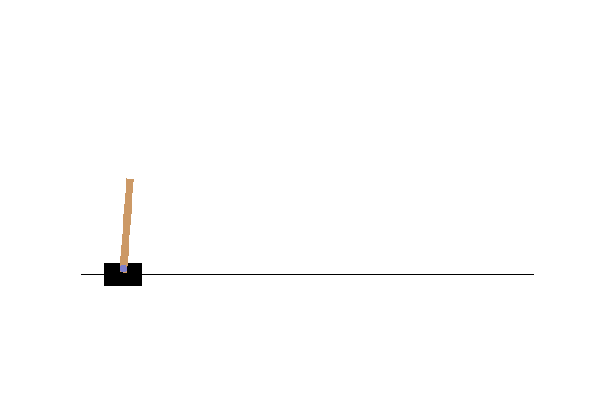
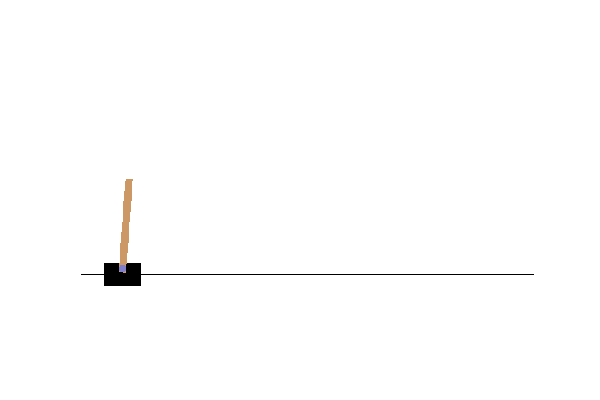
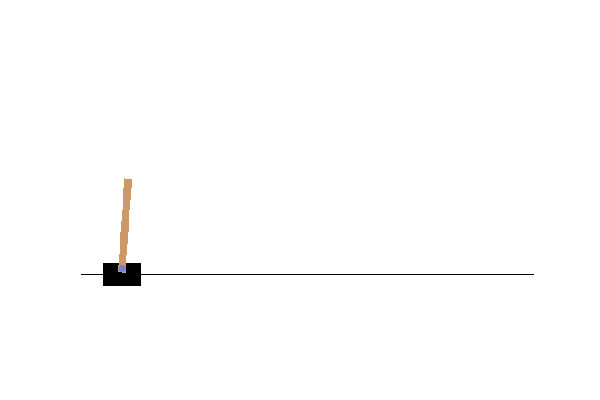
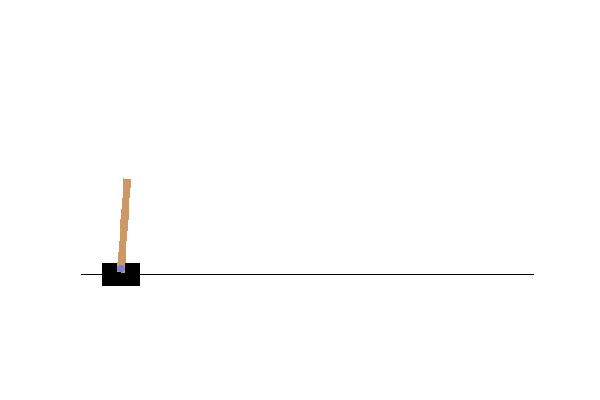
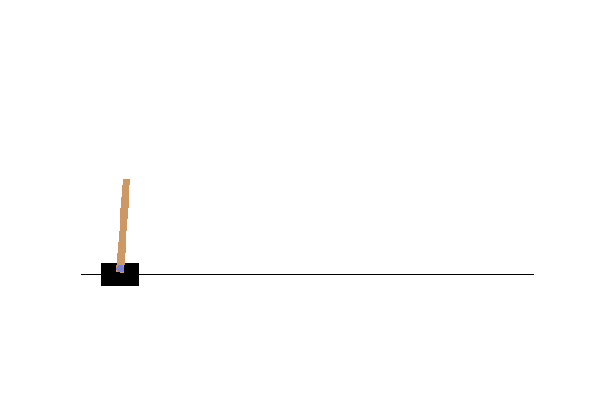
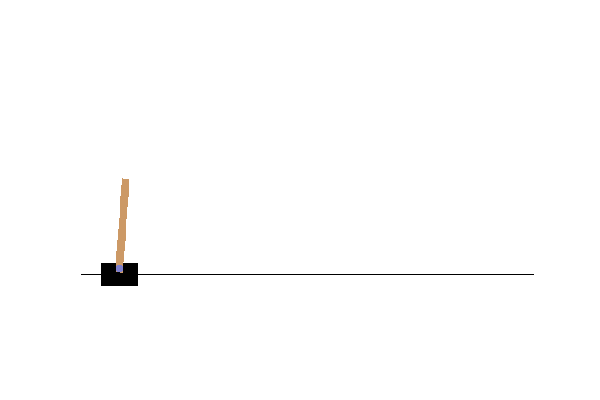
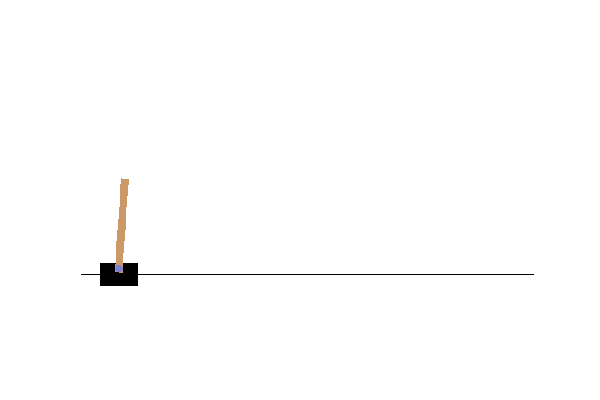
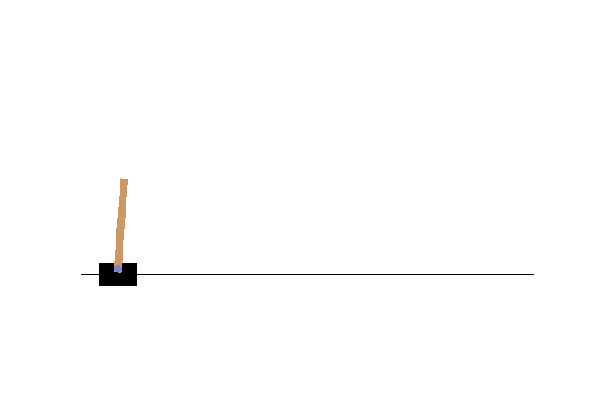
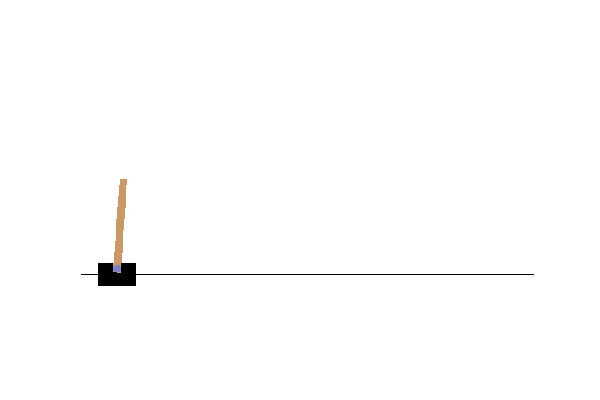
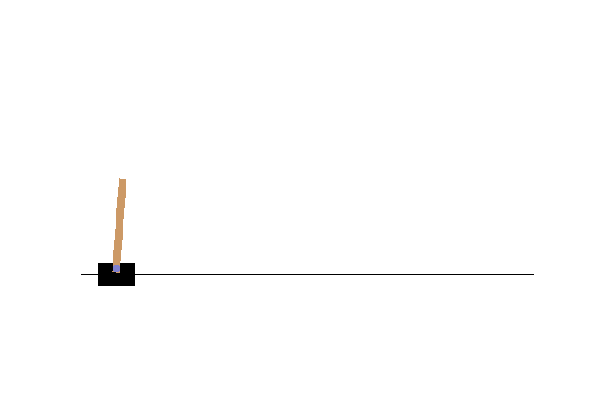
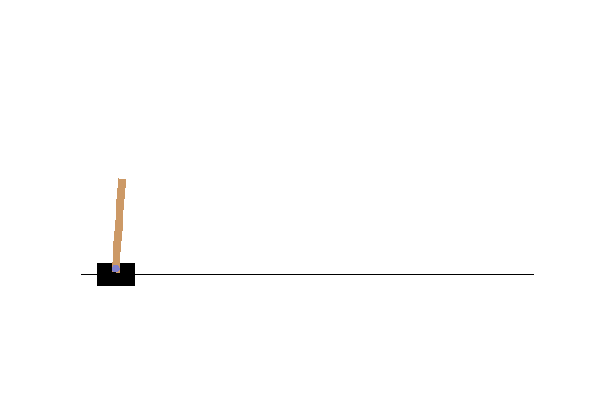
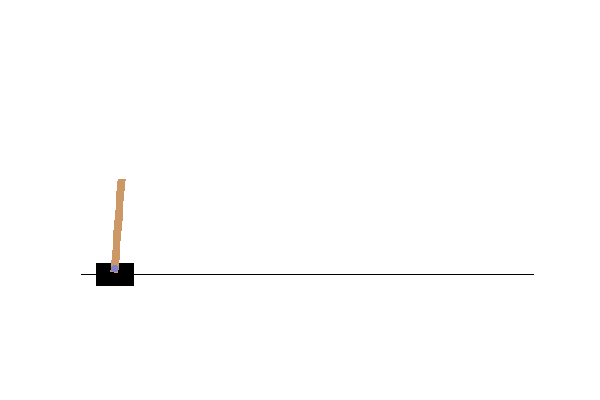
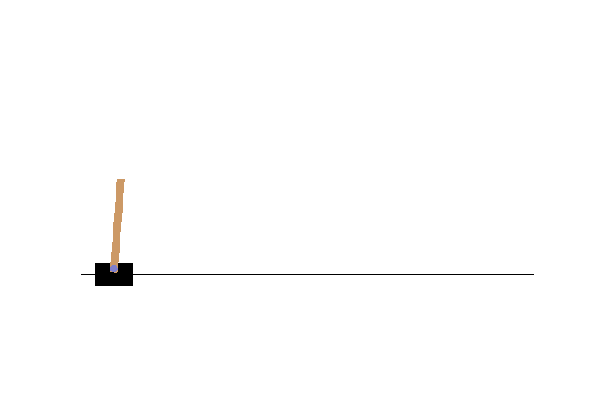
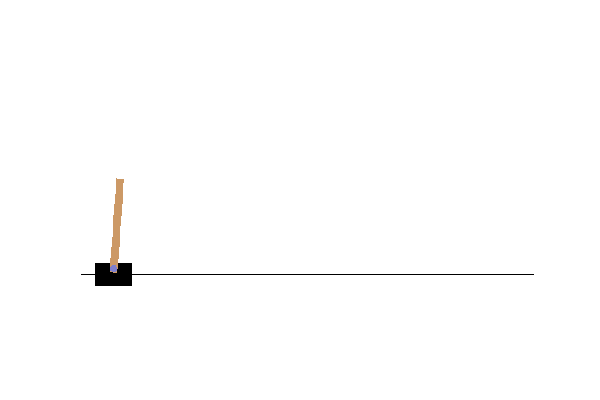
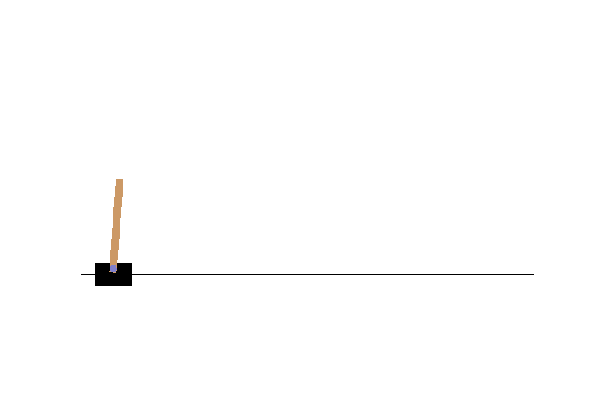
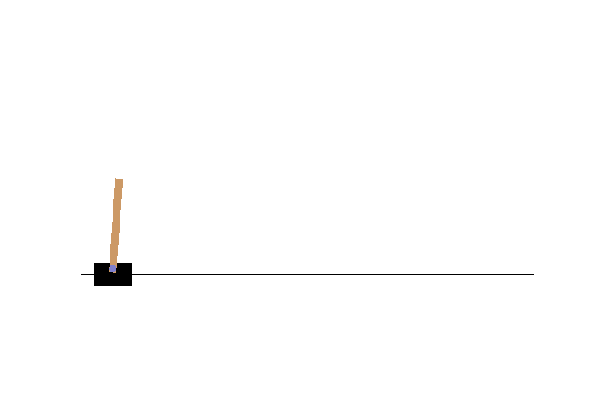
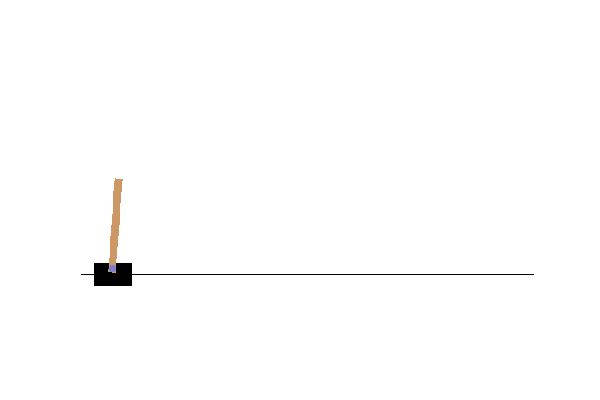
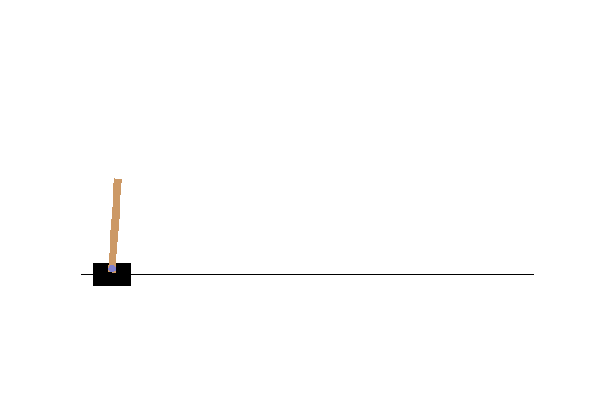
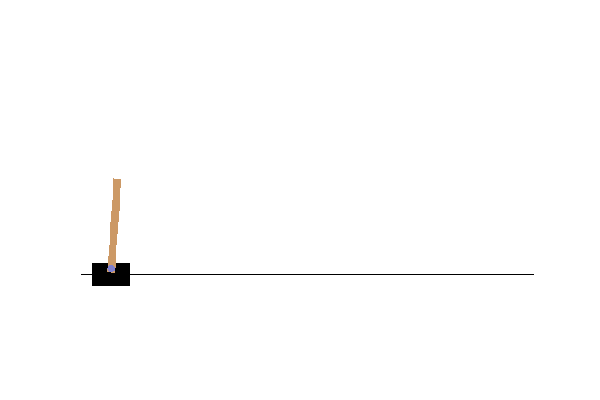
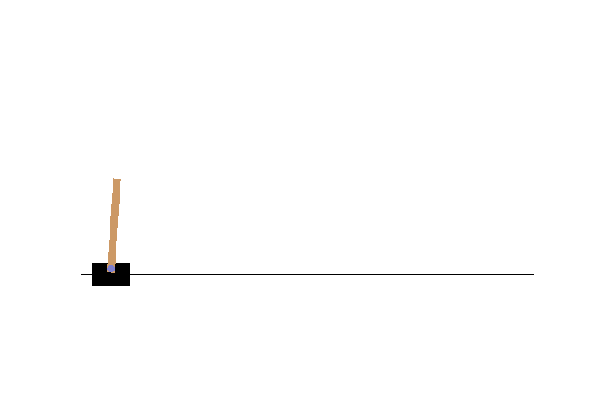
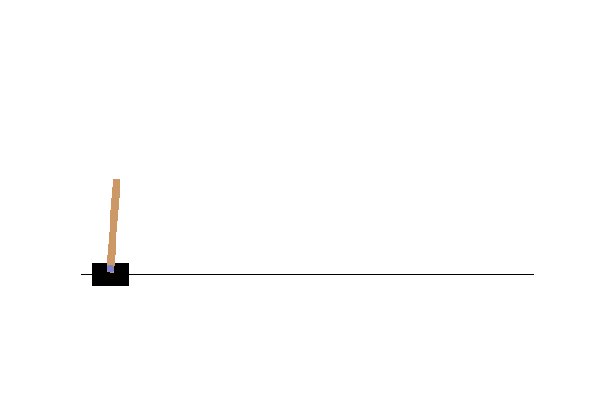
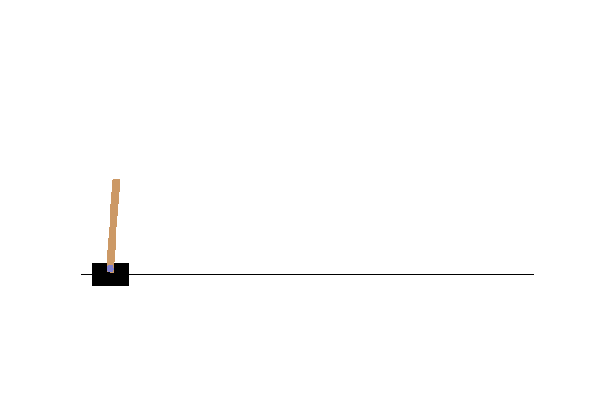
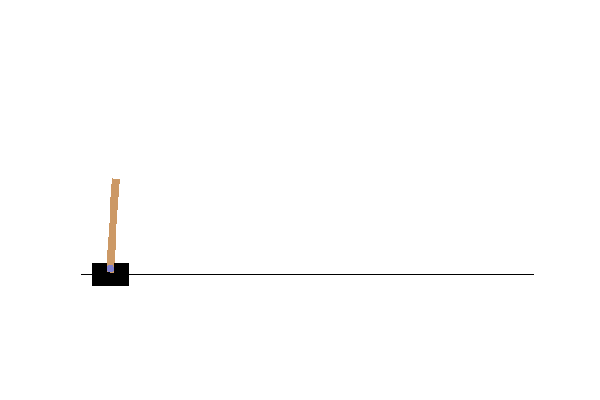
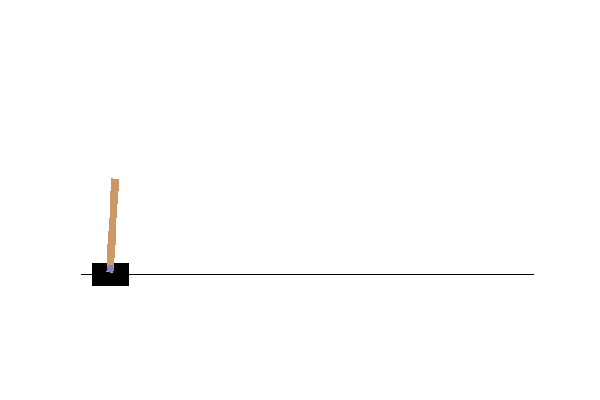
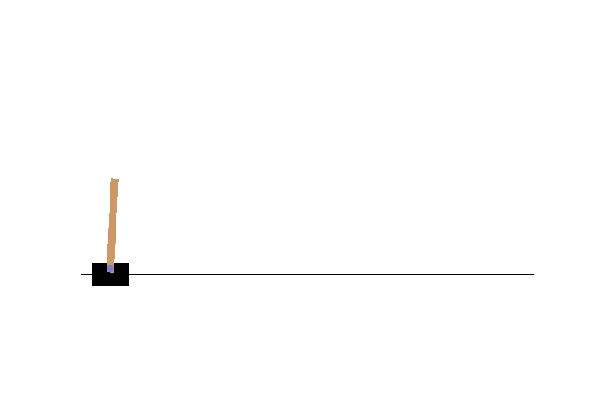
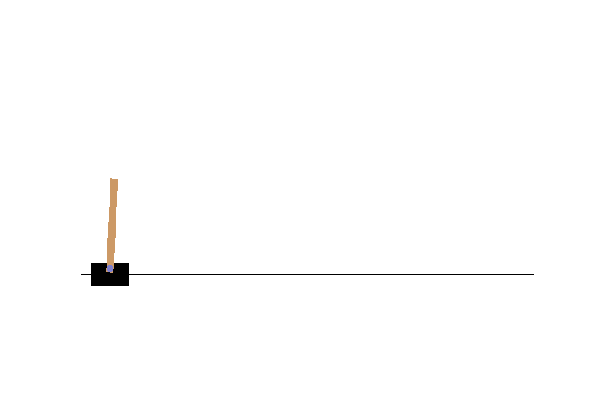
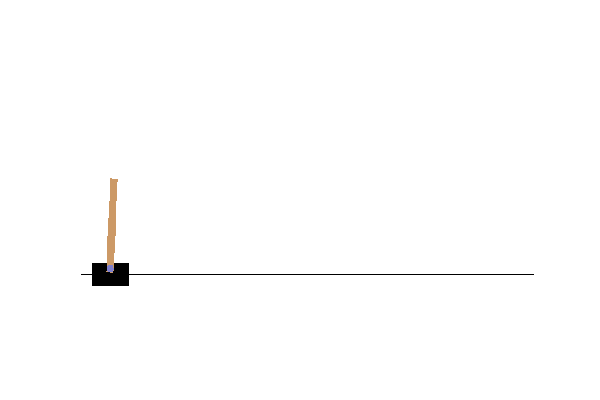
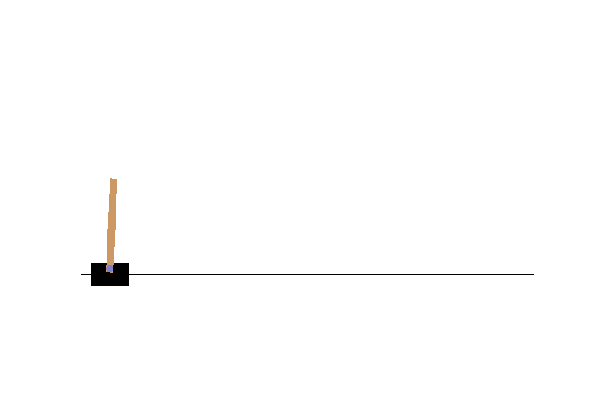
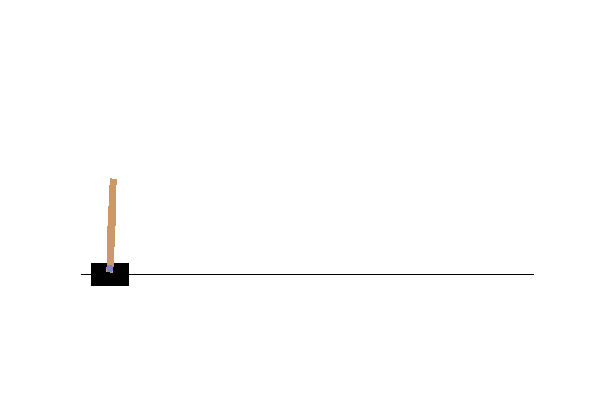
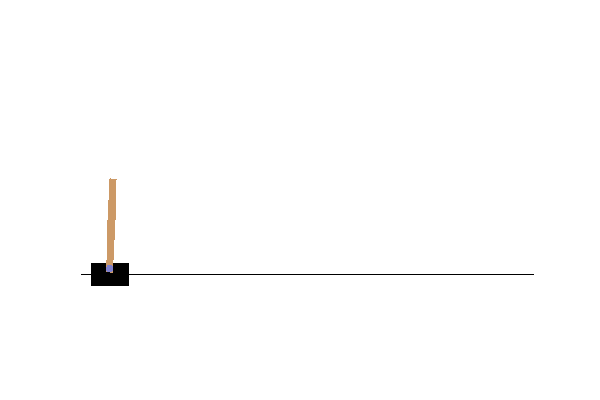
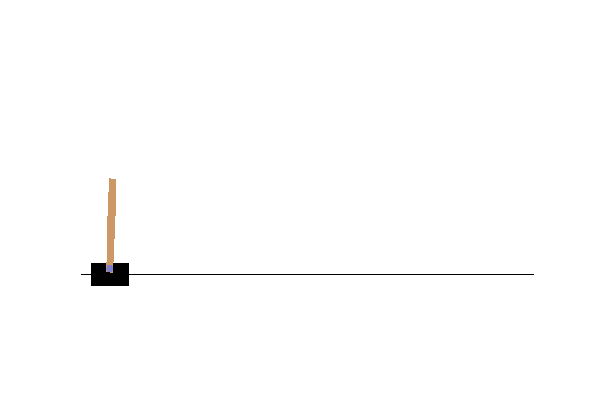
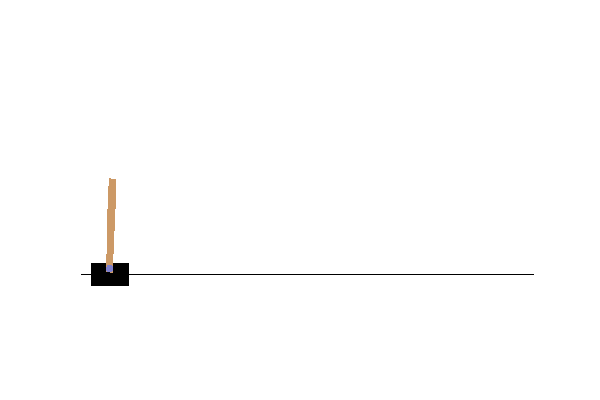
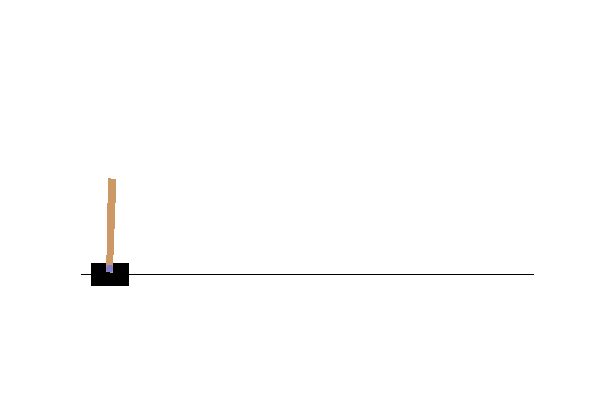
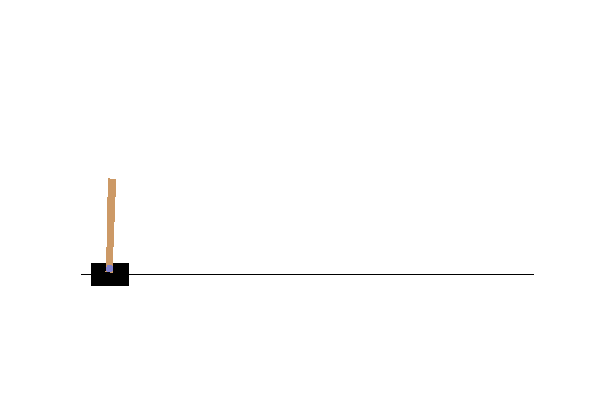
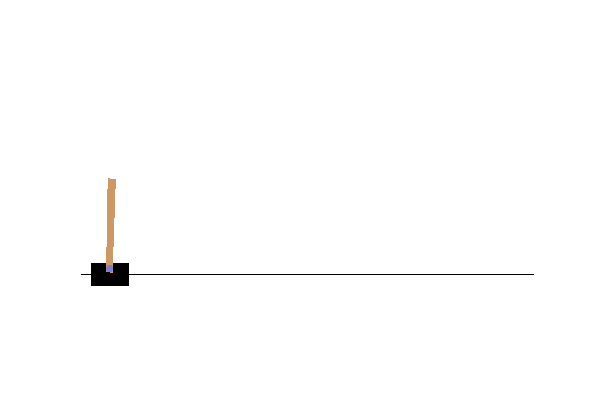
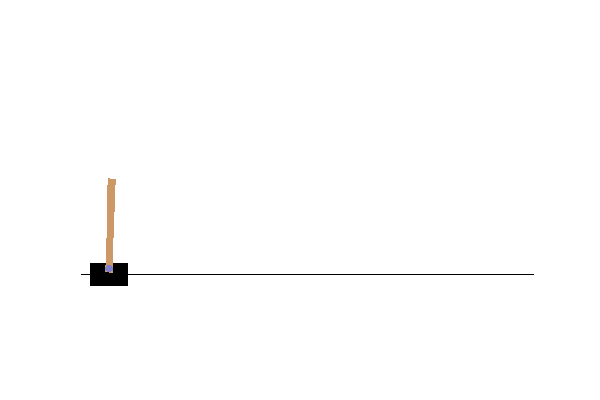
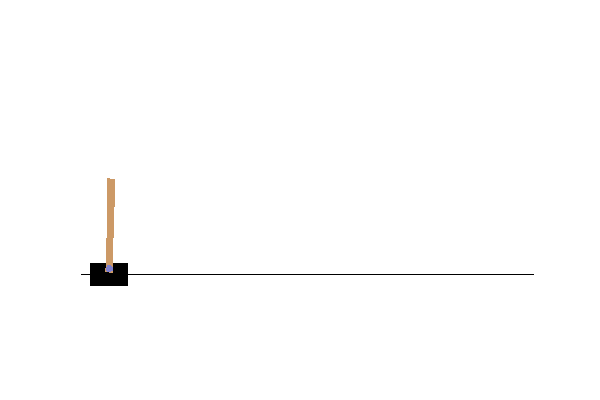
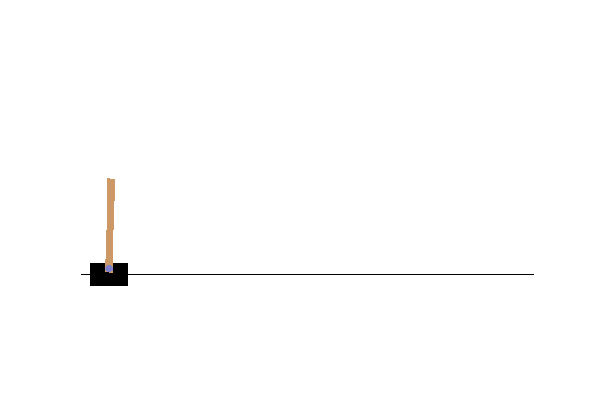
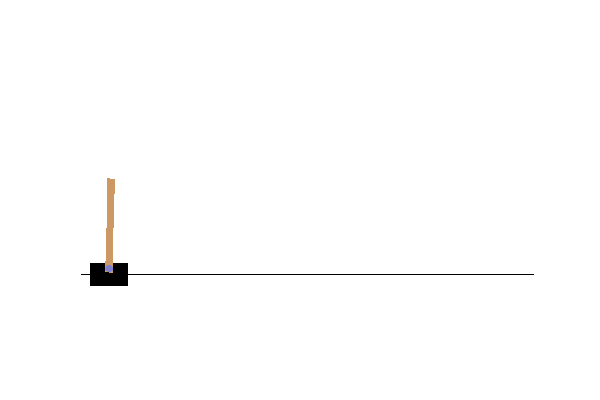
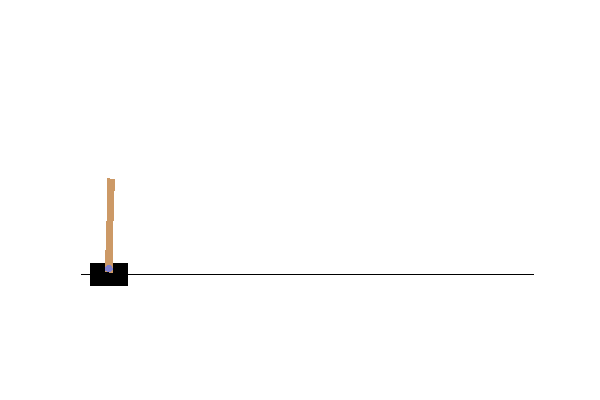
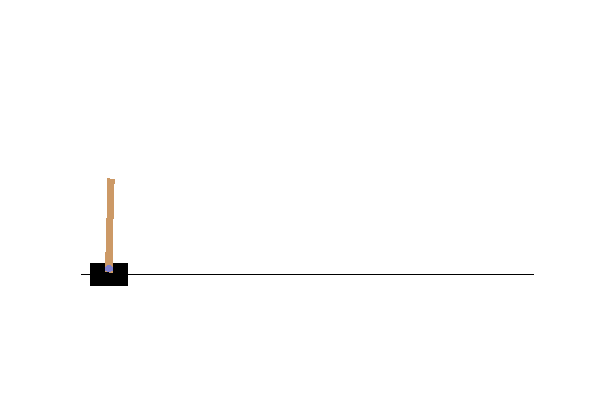
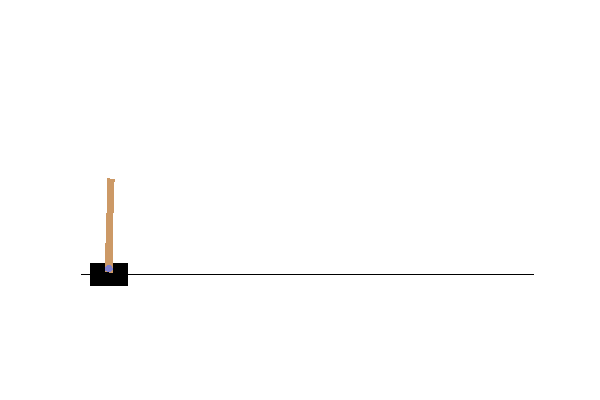
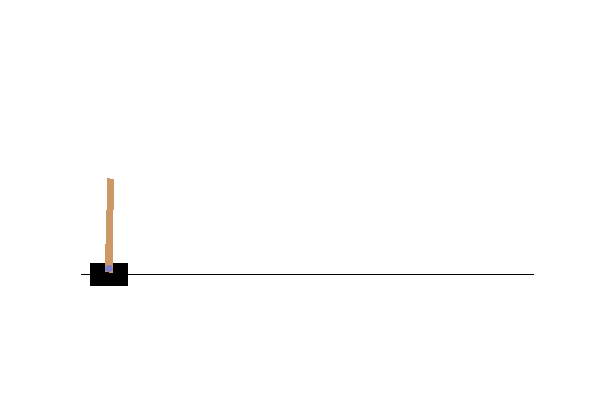
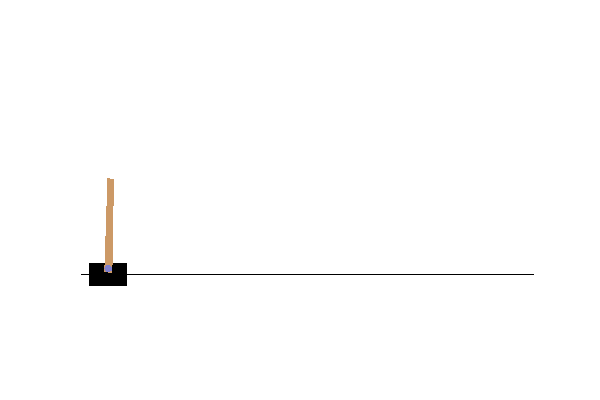
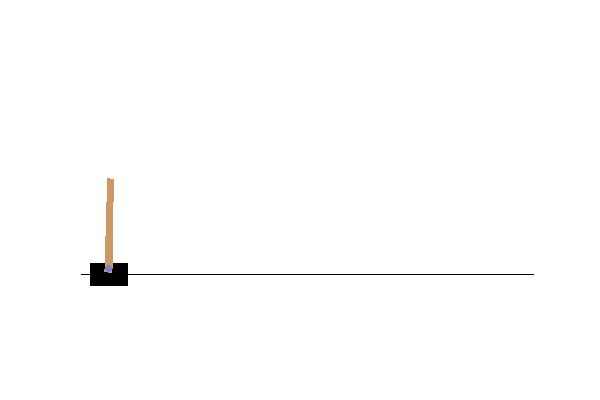
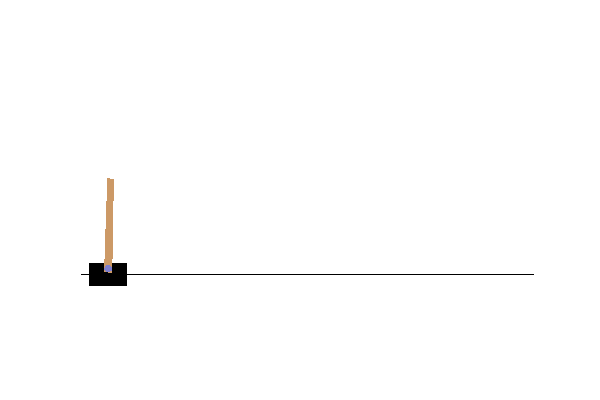
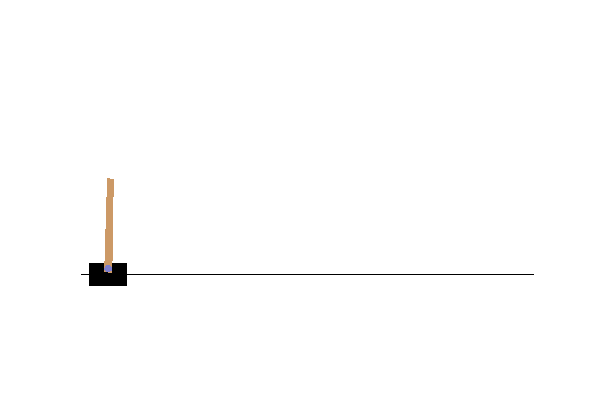
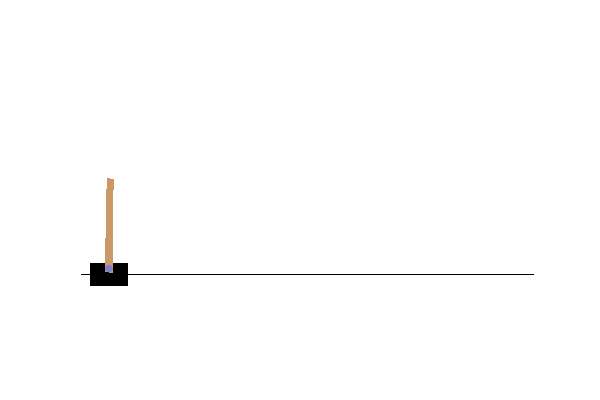
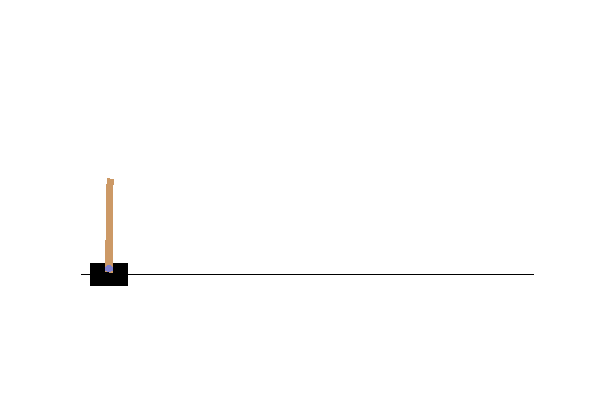
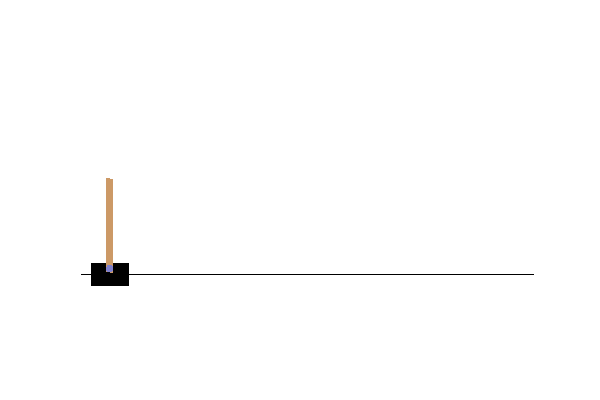
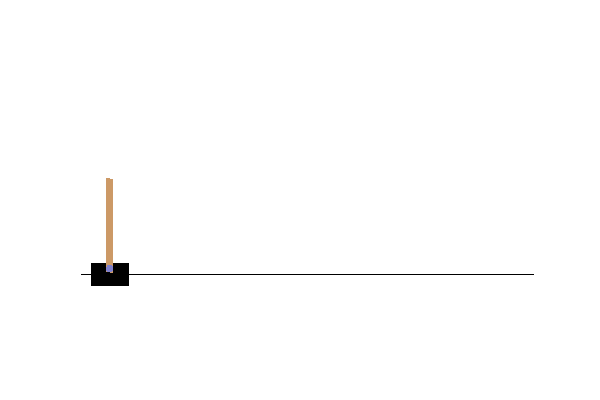
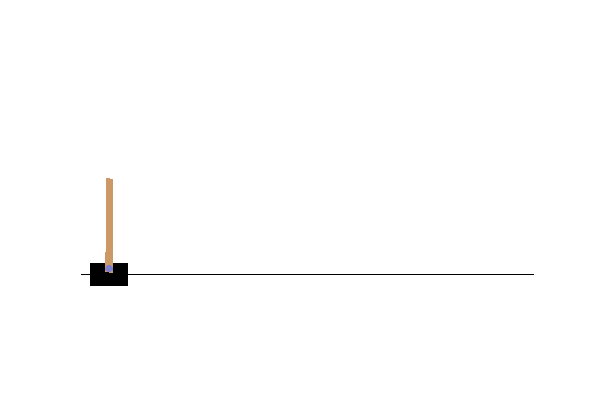
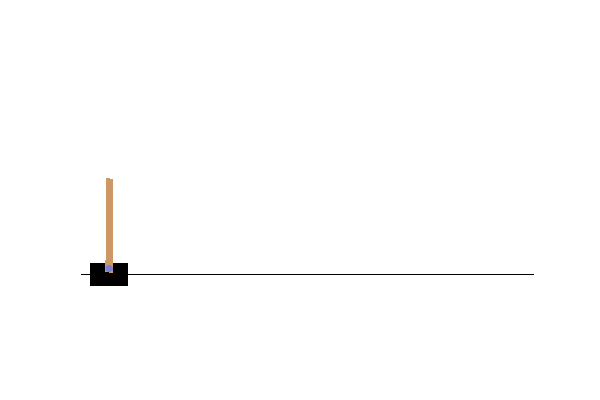
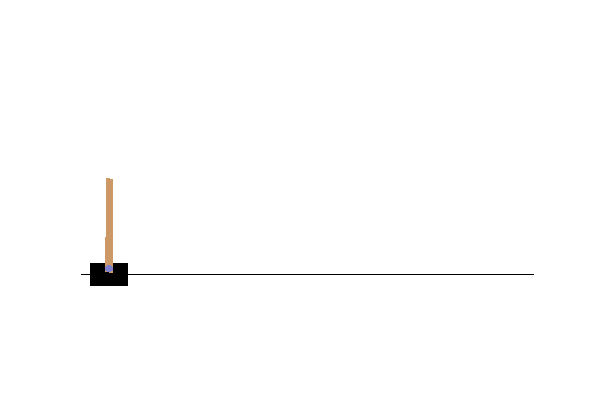
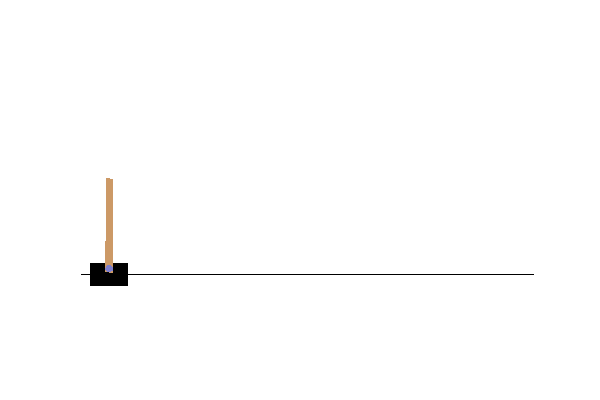
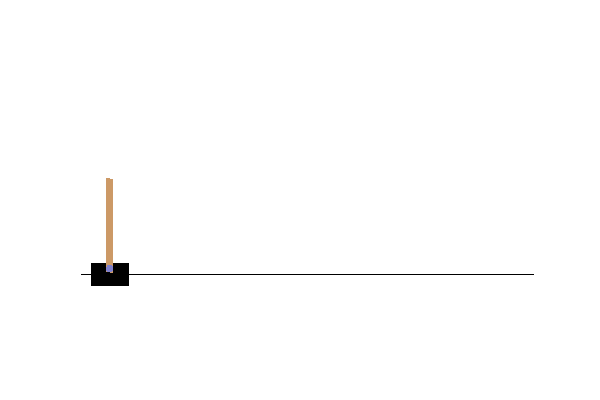

In [12]:
done = False;

# buffer for rgb arrays to create a gif later on
frames = []

for e in range(episodes):
    state = environment.reset()
    state = np.reshape(state, [1, stateSize])
    
    for time in range(5000):
        action = agent.act(state)
        
        nextState, reward, done, _ = environment.step(action)
        
        reward = reward if not done else -10
        
        nextState = np.reshape(nextState, [1, stateSize])
        
        agent.remember(state, action, reward, nextState, done)
        
        state = nextState
        
        if e > episodes-6:
            frames.append(environment.render(mode = 'rgb_array'))
        
        
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}".format(e+1, episodes, time, agent.epsilon))
            
            if :
                display_frames_as_gif(frames)
                frames.clear()
            break
        
    if len(agent.memory) > batchSize:
        agent.replay(batchSize)
    
    if e % 50 == 0:
        agent.save(outputDirectory + "weights " + '{:04d}'.format(e) 
                   + ".hdf5")

environment.close()